# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 10</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e TensorFlow

![title](imagens/mini-projeto3.png)

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

Este é um guia básico pois o TensorFlow é um framework extenso. O TensorFlow é abordado em detalhes nos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> (especialmente no curso Deep Learning Frameworks) e na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação IA Aplicada à Medicina</a>.

Na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>, no curso de Machine Learning também há um módulo sobre TensorFlow. Alguns projetos com TensorFlow podem ser encontrados no curso de IA Aplicada a Finanças da <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-blockchain">Formação Engenheiro Blockchain</a>.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


In [2]:
# Instala o TensorFlow (se necessário)
!pip install -q tensorflow==2.5

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\grpc\\aio\\_base_call.py'
Consider using the `--user` option or check the permissions.



In [19]:
# Instala o Pydot
!pip install -q pydot

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.6.0


## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [8]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

57344/49082 [===================================] - 0s 4us/step


In [9]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [10]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [11]:
# Shape
dataset.shape

(506, 14)

In [12]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 70/30.

In [13]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.7, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

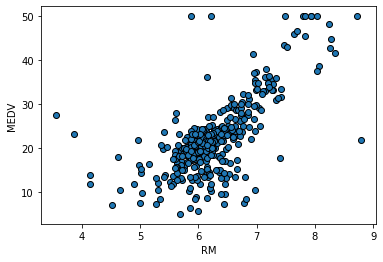

In [14]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [15]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [16]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [17]:
# Cria o modelo 
modelo = modelo_linear()

In [20]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Treinamento do Modelo

In [21]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 70800 amostras


In [22]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [23]:
# Lista para as previsões
predictions_list = []

In [24]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [25]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [26]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [27]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 2s 255ms/step - loss: 245.9395 - mae: 13.4177 - mse: 245.9395 - val_loss: 267.0705 - val_mae: 14.5697 - val_mse: 267.0705
Epoch 2/4000
2/2 [==============================] - 0s 28ms/step - loss: 241.9436 - mae: 13.2794 - mse: 241.9436 - val_loss: 262.6902 - val_mae: 14.4293 - val_mse: 262.6902
Epoch 3/4000
2/2 [==============================] - 0s 24ms/step - loss: 238.0218 - mae: 13.1419 - mse: 238.0218 - val_loss: 258.3602 - val_mae: 14.2890 - val_mse: 258.3602
Epoch 4/4000
2/2 [==============================] - 0s 36ms/step - loss: 234.0981 - mae: 13.0051 - mse: 234.0981 - val_loss: 254.0792 - val_mae: 14.1545 - val_mse: 254.0792
Epoch 5/4000
2/2 [==============================] - 0s 35ms/step - loss: 230.2446 - mae: 12.8710 - mse: 230.2446 - val_loss: 249.8410 - val_mae: 14.0232 - val_mse: 249.8410
Epoch 6/4000
2/2 [==============================] - 0s 39ms/step - loss: 226.4541 - mae: 12.7384 - mse: 226.4541 - val_loss: 245.6524 

Epoch 48/4000
2/2 [==============================] - 0s 27ms/step - loss: 112.5238 - mae: 8.1252 - mse: 112.5238 - val_loss: 118.8476 - val_mae: 9.0948 - val_mse: 118.8476
Epoch 49/4000
2/2 [==============================] - 0s 27ms/step - loss: 110.8248 - mae: 8.0487 - mse: 110.8248 - val_loss: 116.9088 - val_mae: 9.0058 - val_mse: 116.9088
Epoch 50/4000
2/2 [==============================] - 0s 25ms/step - loss: 109.1882 - mae: 7.9747 - mse: 109.1882 - val_loss: 115.0119 - val_mae: 8.9176 - val_mse: 115.0119
Epoch 51/4000
2/2 [==============================] - 0s 24ms/step - loss: 107.5044 - mae: 7.9002 - mse: 107.5044 - val_loss: 113.1490 - val_mae: 8.8297 - val_mse: 113.1490
Epoch 52/4000
2/2 [==============================] - 0s 23ms/step - loss: 105.9741 - mae: 7.8297 - mse: 105.9741 - val_loss: 111.3093 - val_mae: 8.7417 - val_mse: 111.3093
Epoch 53/4000
2/2 [==============================] - 0s 25ms/step - loss: 104.3897 - mae: 7.7584 - mse: 104.3897 - val_loss: 109.5189 - val_

2/2 [==============================] - 0s 25ms/step - loss: 65.3296 - mae: 5.7266 - mse: 65.3296 - val_loss: 62.7995 - val_mae: 6.0131 - val_mse: 62.7995
Epoch 97/4000
2/2 [==============================] - 0s 28ms/step - loss: 64.8816 - mae: 5.6991 - mse: 64.8816 - val_loss: 62.2364 - val_mae: 5.9753 - val_mse: 62.2364
Epoch 98/4000
2/2 [==============================] - 0s 25ms/step - loss: 64.4539 - mae: 5.6728 - mse: 64.4539 - val_loss: 61.6847 - val_mae: 5.9398 - val_mse: 61.6847
Epoch 99/4000
2/2 [==============================] - 0s 24ms/step - loss: 64.0845 - mae: 5.6484 - mse: 64.0845 - val_loss: 61.1507 - val_mae: 5.9061 - val_mse: 61.1507
Epoch 100/4000
2/2 [==============================] - 0s 25ms/step - loss: 63.6948 - mae: 5.6254 - mse: 63.6948 - val_loss: 60.6528 - val_mae: 5.8741 - val_mse: 60.6528
Epoch 101/4000
2/2 [==============================] - 0s 24ms/step - loss: 63.3077 - mae: 5.6019 - mse: 63.3077 - val_loss: 60.1767 - val_mae: 5.8429 - val_mse: 60.1767
Epoc

2/2 [==============================] - 0s 26ms/step - loss: 56.6423 - mae: 5.2760 - mse: 56.6423 - val_loss: 50.0004 - val_mae: 5.3004 - val_mse: 50.0004
Epoch 145/4000
2/2 [==============================] - 0s 26ms/step - loss: 56.5967 - mae: 5.2766 - mse: 56.5967 - val_loss: 49.9070 - val_mae: 5.2973 - val_mse: 49.9070
Epoch 146/4000
2/2 [==============================] - 0s 25ms/step - loss: 56.5576 - mae: 5.2771 - mse: 56.5576 - val_loss: 49.8204 - val_mae: 5.2945 - val_mse: 49.8204
Epoch 147/4000
2/2 [==============================] - 0s 52ms/step - loss: 56.5298 - mae: 5.2783 - mse: 56.5298 - val_loss: 49.7436 - val_mae: 5.2919 - val_mse: 49.7436
Epoch 148/4000
2/2 [==============================] - 0s 39ms/step - loss: 56.4910 - mae: 5.2787 - mse: 56.4910 - val_loss: 49.6769 - val_mae: 5.2896 - val_mse: 49.6769
Epoch 149/4000
2/2 [==============================] - 0s 26ms/step - loss: 56.4572 - mae: 5.2796 - mse: 56.4572 - val_loss: 49.6055 - val_mae: 5.2871 - val_mse: 49.6055
E

2/2 [==============================] - 0s 34ms/step - loss: 56.0839 - mae: 5.3162 - mse: 56.0839 - val_loss: 48.4253 - val_mae: 5.2521 - val_mse: 48.4253
Epoch 193/4000
2/2 [==============================] - 0s 31ms/step - loss: 56.0835 - mae: 5.3173 - mse: 56.0835 - val_loss: 48.4076 - val_mae: 5.2521 - val_mse: 48.4076
Epoch 194/4000
2/2 [==============================] - 0s 26ms/step - loss: 56.0776 - mae: 5.3179 - mse: 56.0776 - val_loss: 48.3964 - val_mae: 5.2520 - val_mse: 48.3964
Epoch 195/4000
2/2 [==============================] - 0s 26ms/step - loss: 56.0773 - mae: 5.3185 - mse: 56.0773 - val_loss: 48.3907 - val_mae: 5.2519 - val_mse: 48.3907
Epoch 196/4000
2/2 [==============================] - 0s 31ms/step - loss: 56.0717 - mae: 5.3183 - mse: 56.0717 - val_loss: 48.3962 - val_mae: 5.2516 - val_mse: 48.3962
Epoch 197/4000
2/2 [==============================] - 0s 28ms/step - loss: 56.0697 - mae: 5.3176 - mse: 56.0697 - val_loss: 48.4048 - val_mae: 5.2514 - val_mse: 48.4048
E

2/2 [==============================] - 0s 21ms/step - loss: 55.9593 - mae: 5.2990 - mse: 55.9593 - val_loss: 48.4117 - val_mae: 5.2425 - val_mse: 48.4117
Epoch 241/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.9585 - mae: 5.3015 - mse: 55.9585 - val_loss: 48.3661 - val_mae: 5.2425 - val_mse: 48.3661
Epoch 242/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.9428 - mae: 5.3037 - mse: 55.9428 - val_loss: 48.3328 - val_mae: 5.2424 - val_mse: 48.3328
Epoch 243/4000
2/2 [==============================] - 0s 24ms/step - loss: 55.9396 - mae: 5.3053 - mse: 55.9396 - val_loss: 48.3040 - val_mae: 5.2424 - val_mse: 48.3040
Epoch 244/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.9311 - mae: 5.3064 - mse: 55.9311 - val_loss: 48.2852 - val_mae: 5.2422 - val_mse: 48.2852
Epoch 245/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.9268 - mae: 5.3072 - mse: 55.9268 - val_loss: 48.2721 - val_mae: 5.2421 - val_mse: 48.2721
E

2/2 [==============================] - 0s 23ms/step - loss: 55.7314 - mae: 5.3149 - mse: 55.7314 - val_loss: 47.8964 - val_mae: 5.2344 - val_mse: 47.8964
Epoch 289/4000
2/2 [==============================] - 0s 26ms/step - loss: 55.7269 - mae: 5.3099 - mse: 55.7269 - val_loss: 47.9360 - val_mae: 5.2324 - val_mse: 47.9360
Epoch 290/4000
2/2 [==============================] - 0s 24ms/step - loss: 55.7180 - mae: 5.3060 - mse: 55.7180 - val_loss: 47.9606 - val_mae: 5.2310 - val_mse: 47.9606
Epoch 291/4000
2/2 [==============================] - 0s 25ms/step - loss: 55.7122 - mae: 5.3034 - mse: 55.7122 - val_loss: 47.9808 - val_mae: 5.2298 - val_mse: 47.9808
Epoch 292/4000
2/2 [==============================] - 0s 23ms/step - loss: 55.7074 - mae: 5.3015 - mse: 55.7074 - val_loss: 48.0040 - val_mae: 5.2291 - val_mse: 48.0040
Epoch 293/4000
2/2 [==============================] - 0s 25ms/step - loss: 55.7091 - mae: 5.2992 - mse: 55.7091 - val_loss: 48.0231 - val_mae: 5.2286 - val_mse: 48.0231
E

2/2 [==============================] - 0s 23ms/step - loss: 55.4480 - mae: 5.2881 - mse: 55.4480 - val_loss: 47.6520 - val_mae: 5.2149 - val_mse: 47.6520
Epoch 337/4000
2/2 [==============================] - 0s 23ms/step - loss: 55.4401 - mae: 5.2924 - mse: 55.4401 - val_loss: 47.5759 - val_mae: 5.2171 - val_mse: 47.5759
Epoch 338/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.4342 - mae: 5.2979 - mse: 55.4342 - val_loss: 47.4994 - val_mae: 5.2194 - val_mse: 47.4994
Epoch 339/4000
2/2 [==============================] - 0s 35ms/step - loss: 55.4386 - mae: 5.3045 - mse: 55.4386 - val_loss: 47.4302 - val_mae: 5.2216 - val_mse: 47.4302
Epoch 340/4000
2/2 [==============================] - 0s 43ms/step - loss: 55.4465 - mae: 5.3116 - mse: 55.4465 - val_loss: 47.3817 - val_mae: 5.2230 - val_mse: 47.3817
Epoch 341/4000
2/2 [==============================] - 0s 32ms/step - loss: 55.4424 - mae: 5.3154 - mse: 55.4424 - val_loss: 47.3547 - val_mae: 5.2235 - val_mse: 47.3547
E

2/2 [==============================] - 0s 29ms/step - loss: 55.1276 - mae: 5.2795 - mse: 55.1276 - val_loss: 47.3045 - val_mae: 5.1938 - val_mse: 47.3045
Epoch 385/4000
2/2 [==============================] - 0s 74ms/step - loss: 55.1269 - mae: 5.2750 - mse: 55.1269 - val_loss: 47.3321 - val_mae: 5.1922 - val_mse: 47.3321
Epoch 386/4000
2/2 [==============================] - 0s 43ms/step - loss: 55.1144 - mae: 5.2723 - mse: 55.1144 - val_loss: 47.3421 - val_mae: 5.1917 - val_mse: 47.3421
Epoch 387/4000
2/2 [==============================] - 0s 49ms/step - loss: 55.1161 - mae: 5.2710 - mse: 55.1161 - val_loss: 47.3342 - val_mae: 5.1912 - val_mse: 47.3342
Epoch 388/4000
2/2 [==============================] - 0s 30ms/step - loss: 55.1051 - mae: 5.2708 - mse: 55.1051 - val_loss: 47.3024 - val_mae: 5.1910 - val_mse: 47.3024
Epoch 389/4000
2/2 [==============================] - 0s 29ms/step - loss: 55.0942 - mae: 5.2719 - mse: 55.0942 - val_loss: 47.2845 - val_mae: 5.1910 - val_mse: 47.2845
E

2/2 [==============================] - 0s 29ms/step - loss: 54.7893 - mae: 5.2582 - mse: 54.7893 - val_loss: 46.9276 - val_mae: 5.1721 - val_mse: 46.9276
Epoch 433/4000
2/2 [==============================] - 0s 26ms/step - loss: 54.7857 - mae: 5.2599 - mse: 54.7857 - val_loss: 46.9047 - val_mae: 5.1722 - val_mse: 46.9047
Epoch 434/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.7769 - mae: 5.2606 - mse: 54.7769 - val_loss: 46.9098 - val_mae: 5.1713 - val_mse: 46.9098
Epoch 435/4000
2/2 [==============================] - 0s 34ms/step - loss: 54.7675 - mae: 5.2586 - mse: 54.7675 - val_loss: 46.9339 - val_mae: 5.1695 - val_mse: 46.9339
Epoch 436/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.7574 - mae: 5.2554 - mse: 54.7574 - val_loss: 46.9660 - val_mae: 5.1688 - val_mse: 46.9660
Epoch 437/4000
2/2 [==============================] - 0s 28ms/step - loss: 54.7453 - mae: 5.2517 - mse: 54.7453 - val_loss: 47.0275 - val_mae: 5.1679 - val_mse: 47.0275
E

2/2 [==============================] - 0s 24ms/step - loss: 54.4528 - mae: 5.2561 - mse: 54.4528 - val_loss: 46.4122 - val_mae: 5.1549 - val_mse: 46.4122
Epoch 481/4000
2/2 [==============================] - 0s 25ms/step - loss: 54.4482 - mae: 5.2578 - mse: 54.4482 - val_loss: 46.3931 - val_mae: 5.1549 - val_mse: 46.3931
Epoch 482/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.4453 - mae: 5.2589 - mse: 54.4453 - val_loss: 46.3820 - val_mae: 5.1546 - val_mse: 46.3820
Epoch 483/4000
2/2 [==============================] - 0s 30ms/step - loss: 54.4400 - mae: 5.2588 - mse: 54.4400 - val_loss: 46.3760 - val_mae: 5.1540 - val_mse: 46.3760
Epoch 484/4000
2/2 [==============================] - 0s 25ms/step - loss: 54.4297 - mae: 5.2583 - mse: 54.4297 - val_loss: 46.3528 - val_mae: 5.1543 - val_mse: 46.3528
Epoch 485/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.4264 - mae: 5.2602 - mse: 54.4264 - val_loss: 46.3241 - val_mae: 5.1548 - val_mse: 46.3241
E

2/2 [==============================] - 0s 28ms/step - loss: 54.0985 - mae: 5.2036 - mse: 54.0985 - val_loss: 46.4021 - val_mae: 5.1241 - val_mse: 46.4021
Epoch 529/4000
2/2 [==============================] - 0s 26ms/step - loss: 54.0918 - mae: 5.2071 - mse: 54.0918 - val_loss: 46.3404 - val_mae: 5.1239 - val_mse: 46.3404
Epoch 530/4000
2/2 [==============================] - 0s 30ms/step - loss: 54.0745 - mae: 5.2098 - mse: 54.0745 - val_loss: 46.2793 - val_mae: 5.1238 - val_mse: 46.2793
Epoch 531/4000
2/2 [==============================] - 0s 26ms/step - loss: 54.0582 - mae: 5.2136 - mse: 54.0582 - val_loss: 46.1917 - val_mae: 5.1238 - val_mse: 46.1917
Epoch 532/4000
2/2 [==============================] - 0s 28ms/step - loss: 54.0683 - mae: 5.2224 - mse: 54.0683 - val_loss: 46.0978 - val_mae: 5.1265 - val_mse: 46.0978
Epoch 533/4000
2/2 [==============================] - 0s 26ms/step - loss: 54.0739 - mae: 5.2305 - mse: 54.0739 - val_loss: 46.0350 - val_mae: 5.1286 - val_mse: 46.0350
E

2/2 [==============================] - 0s 25ms/step - loss: 53.7554 - mae: 5.1819 - mse: 53.7554 - val_loss: 46.1504 - val_mae: 5.1001 - val_mse: 46.1504
Epoch 577/4000
2/2 [==============================] - 0s 29ms/step - loss: 53.7511 - mae: 5.1797 - mse: 53.7511 - val_loss: 46.1774 - val_mae: 5.0994 - val_mse: 46.1774
Epoch 578/4000
2/2 [==============================] - 0s 30ms/step - loss: 53.7460 - mae: 5.1771 - mse: 53.7460 - val_loss: 46.2287 - val_mae: 5.0999 - val_mse: 46.2287
Epoch 579/4000
2/2 [==============================] - 0s 24ms/step - loss: 53.7493 - mae: 5.1736 - mse: 53.7493 - val_loss: 46.3008 - val_mae: 5.1011 - val_mse: 46.3008
Epoch 580/4000
2/2 [==============================] - 0s 27ms/step - loss: 53.7553 - mae: 5.1683 - mse: 53.7553 - val_loss: 46.3668 - val_mae: 5.1022 - val_mse: 46.3668
Epoch 581/4000
2/2 [==============================] - 0s 24ms/step - loss: 53.7704 - mae: 5.1646 - mse: 53.7704 - val_loss: 46.4200 - val_mae: 5.1029 - val_mse: 46.4200
E

2/2 [==============================] - 0s 25ms/step - loss: 53.4039 - mae: 5.1738 - mse: 53.4039 - val_loss: 45.6172 - val_mae: 5.0778 - val_mse: 45.6172
Epoch 625/4000
2/2 [==============================] - 0s 24ms/step - loss: 53.3954 - mae: 5.1738 - mse: 53.3954 - val_loss: 45.6115 - val_mae: 5.0773 - val_mse: 45.6115
Epoch 626/4000
2/2 [==============================] - 0s 26ms/step - loss: 53.3887 - mae: 5.1732 - mse: 53.3887 - val_loss: 45.6049 - val_mae: 5.0768 - val_mse: 45.6049
Epoch 627/4000
2/2 [==============================] - 0s 26ms/step - loss: 53.3812 - mae: 5.1728 - mse: 53.3812 - val_loss: 45.5946 - val_mae: 5.0763 - val_mse: 45.5946
Epoch 628/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.3750 - mae: 5.1727 - mse: 53.3750 - val_loss: 45.5895 - val_mae: 5.0758 - val_mse: 45.5895
Epoch 629/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.3674 - mae: 5.1721 - mse: 53.3674 - val_loss: 45.6084 - val_mae: 5.0752 - val_mse: 45.6084
E

2/2 [==============================] - 0s 30ms/step - loss: 53.0738 - mae: 5.1587 - mse: 53.0738 - val_loss: 45.2570 - val_mae: 5.0552 - val_mse: 45.2570
Epoch 673/4000
2/2 [==============================] - 0s 23ms/step - loss: 53.0663 - mae: 5.1576 - mse: 53.0663 - val_loss: 45.2581 - val_mae: 5.0546 - val_mse: 45.2581
Epoch 674/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.0623 - mae: 5.1565 - mse: 53.0623 - val_loss: 45.2508 - val_mae: 5.0541 - val_mse: 45.2508
Epoch 675/4000
2/2 [==============================] - 0s 23ms/step - loss: 53.0546 - mae: 5.1564 - mse: 53.0546 - val_loss: 45.2324 - val_mae: 5.0537 - val_mse: 45.2324
Epoch 676/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.0449 - mae: 5.1567 - mse: 53.0449 - val_loss: 45.2325 - val_mae: 5.0531 - val_mse: 45.2325
Epoch 677/4000
2/2 [==============================] - 0s 26ms/step - loss: 53.0381 - mae: 5.1557 - mse: 53.0381 - val_loss: 45.2528 - val_mae: 5.0525 - val_mse: 45.2528
E

2/2 [==============================] - 0s 24ms/step - loss: 52.7473 - mae: 5.1326 - mse: 52.7473 - val_loss: 45.0028 - val_mae: 5.0317 - val_mse: 45.0028
Epoch 721/4000
2/2 [==============================] - 0s 27ms/step - loss: 52.7407 - mae: 5.1322 - mse: 52.7407 - val_loss: 45.0077 - val_mae: 5.0312 - val_mse: 45.0077
Epoch 722/4000
2/2 [==============================] - 0s 26ms/step - loss: 52.7333 - mae: 5.1307 - mse: 52.7333 - val_loss: 45.0265 - val_mae: 5.0305 - val_mse: 45.0265
Epoch 723/4000
2/2 [==============================] - 0s 24ms/step - loss: 52.7267 - mae: 5.1281 - mse: 52.7267 - val_loss: 45.0574 - val_mae: 5.0300 - val_mse: 45.0574
Epoch 724/4000
2/2 [==============================] - 0s 25ms/step - loss: 52.7206 - mae: 5.1250 - mse: 52.7206 - val_loss: 45.1071 - val_mae: 5.0309 - val_mse: 45.1071
Epoch 725/4000
2/2 [==============================] - 0s 24ms/step - loss: 52.7213 - mae: 5.1200 - mse: 52.7213 - val_loss: 45.1677 - val_mae: 5.0321 - val_mse: 45.1677
E

2/2 [==============================] - 0s 25ms/step - loss: 52.4261 - mae: 5.1122 - mse: 52.4261 - val_loss: 44.7041 - val_mae: 5.0085 - val_mse: 44.7041
Epoch 769/4000
2/2 [==============================] - 0s 25ms/step - loss: 52.4246 - mae: 5.1106 - mse: 52.4246 - val_loss: 44.7067 - val_mae: 5.0079 - val_mse: 44.7067
Epoch 770/4000
2/2 [==============================] - 0s 23ms/step - loss: 52.4133 - mae: 5.1099 - mse: 52.4133 - val_loss: 44.6854 - val_mae: 5.0076 - val_mse: 44.6854
Epoch 771/4000
2/2 [==============================] - 0s 29ms/step - loss: 52.4043 - mae: 5.1107 - mse: 52.4043 - val_loss: 44.6738 - val_mae: 5.0071 - val_mse: 44.6738
Epoch 772/4000
2/2 [==============================] - 0s 26ms/step - loss: 52.3975 - mae: 5.1107 - mse: 52.3975 - val_loss: 44.6620 - val_mae: 5.0067 - val_mse: 44.6620
Epoch 773/4000
2/2 [==============================] - 0s 25ms/step - loss: 52.3902 - mae: 5.1107 - mse: 52.3902 - val_loss: 44.6488 - val_mae: 5.0062 - val_mse: 44.6488
E

2/2 [==============================] - 0s 22ms/step - loss: 52.1069 - mae: 5.1059 - mse: 52.1069 - val_loss: 44.2355 - val_mae: 4.9864 - val_mse: 44.2355
Epoch 817/4000
2/2 [==============================] - 0s 28ms/step - loss: 52.0996 - mae: 5.1067 - mse: 52.0996 - val_loss: 44.1986 - val_mae: 4.9863 - val_mse: 44.1986
Epoch 818/4000
2/2 [==============================] - 0s 24ms/step - loss: 52.0990 - mae: 5.1098 - mse: 52.0990 - val_loss: 44.1509 - val_mae: 4.9862 - val_mse: 44.1509
Epoch 819/4000
2/2 [==============================] - 0s 29ms/step - loss: 52.1001 - mae: 5.1145 - mse: 52.1001 - val_loss: 44.1152 - val_mae: 4.9860 - val_mse: 44.1152
Epoch 820/4000
2/2 [==============================] - 0s 23ms/step - loss: 52.1032 - mae: 5.1179 - mse: 52.1032 - val_loss: 44.0944 - val_mae: 4.9856 - val_mse: 44.0944
Epoch 821/4000
2/2 [==============================] - 0s 31ms/step - loss: 52.0987 - mae: 5.1193 - mse: 52.0987 - val_loss: 44.0860 - val_mae: 4.9852 - val_mse: 44.0860
E

2/2 [==============================] - 0s 28ms/step - loss: 51.8077 - mae: 5.0740 - mse: 51.8077 - val_loss: 44.0692 - val_mae: 4.9642 - val_mse: 44.0692
Epoch 865/4000
2/2 [==============================] - 0s 25ms/step - loss: 51.7915 - mae: 5.0758 - mse: 51.7915 - val_loss: 44.0550 - val_mae: 4.9635 - val_mse: 44.0550
Epoch 866/4000
2/2 [==============================] - 0s 28ms/step - loss: 51.7838 - mae: 5.0759 - mse: 51.7838 - val_loss: 44.0495 - val_mae: 4.9631 - val_mse: 44.0495
Epoch 867/4000
2/2 [==============================] - 0s 25ms/step - loss: 51.7802 - mae: 5.0754 - mse: 51.7802 - val_loss: 44.0336 - val_mae: 4.9624 - val_mse: 44.0336
Epoch 868/4000
2/2 [==============================] - 0s 24ms/step - loss: 51.7727 - mae: 5.0764 - mse: 51.7727 - val_loss: 44.0002 - val_mae: 4.9612 - val_mse: 44.0002
Epoch 869/4000
2/2 [==============================] - 0s 25ms/step - loss: 51.7634 - mae: 5.0782 - mse: 51.7634 - val_loss: 43.9743 - val_mae: 4.9609 - val_mse: 43.9743
E

2/2 [==============================] - 0s 27ms/step - loss: 51.5513 - mae: 5.0369 - mse: 51.5513 - val_loss: 44.1015 - val_mae: 4.9514 - val_mse: 44.1015
Epoch 913/4000
2/2 [==============================] - 0s 23ms/step - loss: 51.5401 - mae: 5.0373 - mse: 51.5401 - val_loss: 44.0806 - val_mae: 4.9506 - val_mse: 44.0806
Epoch 914/4000
2/2 [==============================] - 0s 25ms/step - loss: 51.5301 - mae: 5.0377 - mse: 51.5301 - val_loss: 44.0462 - val_mae: 4.9496 - val_mse: 44.0462
Epoch 915/4000
2/2 [==============================] - 0s 27ms/step - loss: 51.5211 - mae: 5.0393 - mse: 51.5211 - val_loss: 44.0031 - val_mae: 4.9483 - val_mse: 44.0031
Epoch 916/4000
2/2 [==============================] - 0s 24ms/step - loss: 51.5051 - mae: 5.0409 - mse: 51.5051 - val_loss: 43.9587 - val_mae: 4.9469 - val_mse: 43.9587
Epoch 917/4000
2/2 [==============================] - ETA: 0s - loss: 53.3207 - mae: 5.1166 - mse: 53.320 - 0s 22ms/step - loss: 51.4915 - mae: 5.0432 - mse: 51.4915 - va

2/2 [==============================] - 0s 25ms/step - loss: 51.2238 - mae: 5.0622 - mse: 51.2238 - val_loss: 43.2584 - val_mae: 4.9200 - val_mse: 43.2584
Epoch 961/4000
2/2 [==============================] - 0s 23ms/step - loss: 51.2232 - mae: 5.0662 - mse: 51.2232 - val_loss: 43.2389 - val_mae: 4.9196 - val_mse: 43.2389
Epoch 962/4000
2/2 [==============================] - 0s 29ms/step - loss: 51.2187 - mae: 5.0673 - mse: 51.2187 - val_loss: 43.2346 - val_mae: 4.9191 - val_mse: 43.2346
Epoch 963/4000
2/2 [==============================] - 0s 23ms/step - loss: 51.2149 - mae: 5.0666 - mse: 51.2149 - val_loss: 43.2313 - val_mae: 4.9186 - val_mse: 43.2313
Epoch 964/4000
2/2 [==============================] - 0s 24ms/step - loss: 51.2076 - mae: 5.0662 - mse: 51.2076 - val_loss: 43.2299 - val_mae: 4.9181 - val_mse: 43.2299
Epoch 965/4000
2/2 [==============================] - 0s 23ms/step - loss: 51.1980 - mae: 5.0646 - mse: 51.1980 - val_loss: 43.2472 - val_mae: 4.9174 - val_mse: 43.2472
E

2/2 [==============================] - 0s 27ms/step - loss: 50.9027 - mae: 5.0362 - mse: 50.9027 - val_loss: 43.0852 - val_mae: 4.8961 - val_mse: 43.0852
Epoch 1009/4000
2/2 [==============================] - 0s 29ms/step - loss: 50.9097 - mae: 5.0331 - mse: 50.9097 - val_loss: 43.0971 - val_mae: 4.8962 - val_mse: 43.0971
Epoch 1010/4000
2/2 [==============================] - 0s 27ms/step - loss: 50.8871 - mae: 5.0302 - mse: 50.8871 - val_loss: 43.0795 - val_mae: 4.8954 - val_mse: 43.0795
Epoch 1011/4000
2/2 [==============================] - 0s 25ms/step - loss: 50.8819 - mae: 5.0310 - mse: 50.8819 - val_loss: 43.0699 - val_mae: 4.8948 - val_mse: 43.0699
Epoch 1012/4000
2/2 [==============================] - 0s 28ms/step - loss: 50.8761 - mae: 5.0310 - mse: 50.8761 - val_loss: 43.0730 - val_mae: 4.8947 - val_mse: 43.0730
Epoch 1013/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.8805 - mae: 5.0298 - mse: 50.8805 - val_loss: 43.0689 - val_mae: 4.8943 - val_mse: 43.0

Epoch 1056/4000
2/2 [==============================] - 0s 27ms/step - loss: 50.6191 - mae: 5.0152 - mse: 50.6191 - val_loss: 42.8238 - val_mae: 4.8755 - val_mse: 42.8238
Epoch 1057/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.6117 - mae: 5.0139 - mse: 50.6117 - val_loss: 42.8272 - val_mae: 4.8753 - val_mse: 42.8272
Epoch 1058/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.6047 - mae: 5.0125 - mse: 50.6047 - val_loss: 42.8386 - val_mae: 4.8754 - val_mse: 42.8386
Epoch 1059/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.5957 - mae: 5.0100 - mse: 50.5957 - val_loss: 42.8665 - val_mae: 4.8761 - val_mse: 42.8665
Epoch 1060/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.5990 - mae: 5.0065 - mse: 50.5990 - val_loss: 42.8974 - val_mae: 4.8767 - val_mse: 42.8974
Epoch 1061/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.5879 - mae: 5.0031 - mse: 50.5879 - val_loss: 42.8982 - val_mae: 4.8765

2/2 [==============================] - 0s 27ms/step - loss: 50.3535 - mae: 5.0028 - mse: 50.3535 - val_loss: 42.5417 - val_mae: 4.8541 - val_mse: 42.5417
Epoch 1105/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.3387 - mae: 4.9988 - mse: 50.3387 - val_loss: 42.5618 - val_mae: 4.8545 - val_mse: 42.5618
Epoch 1106/4000
2/2 [==============================] - 0s 28ms/step - loss: 50.3298 - mae: 4.9957 - mse: 50.3298 - val_loss: 42.5899 - val_mae: 4.8552 - val_mse: 42.5899
Epoch 1107/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.3250 - mae: 4.9917 - mse: 50.3250 - val_loss: 42.6191 - val_mae: 4.8559 - val_mse: 42.6191
Epoch 1108/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.3164 - mae: 4.9883 - mse: 50.3164 - val_loss: 42.6449 - val_mae: 4.8564 - val_mse: 42.6449
Epoch 1109/4000
2/2 [==============================] - 0s 25ms/step - loss: 50.3101 - mae: 4.9852 - mse: 50.3101 - val_loss: 42.6802 - val_mae: 4.8572 - val_mse: 42.6

2/2 [==============================] - 0s 27ms/step - loss: 50.0892 - mae: 4.9680 - mse: 50.0892 - val_loss: 42.4311 - val_mae: 4.8389 - val_mse: 42.4311
Epoch 1153/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.0798 - mae: 4.9705 - mse: 50.0798 - val_loss: 42.3935 - val_mae: 4.8375 - val_mse: 42.3935
Epoch 1154/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.0724 - mae: 4.9730 - mse: 50.0724 - val_loss: 42.3484 - val_mae: 4.8358 - val_mse: 42.3484
Epoch 1155/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.0666 - mae: 4.9768 - mse: 50.0666 - val_loss: 42.2966 - val_mae: 4.8338 - val_mse: 42.2966
Epoch 1156/4000
2/2 [==============================] - 0s 27ms/step - loss: 50.0703 - mae: 4.9812 - mse: 50.0703 - val_loss: 42.2481 - val_mae: 4.8318 - val_mse: 42.2481
Epoch 1157/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.0741 - mae: 4.9863 - mse: 50.0741 - val_loss: 42.2173 - val_mae: 4.8304 - val_mse: 42.2

2/2 [==============================] - 0s 25ms/step - loss: 49.8275 - mae: 4.9653 - mse: 49.8275 - val_loss: 42.1160 - val_mae: 4.8162 - val_mse: 42.1160
Epoch 1201/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.8235 - mae: 4.9588 - mse: 49.8235 - val_loss: 42.1418 - val_mae: 4.8168 - val_mse: 42.1418
Epoch 1202/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.8090 - mae: 4.9557 - mse: 49.8090 - val_loss: 42.1473 - val_mae: 4.8167 - val_mse: 42.1473
Epoch 1203/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.8035 - mae: 4.9543 - mse: 49.8035 - val_loss: 42.1612 - val_mae: 4.8169 - val_mse: 42.1612
Epoch 1204/4000
2/2 [==============================] - 0s 26ms/step - loss: 49.7971 - mae: 4.9522 - mse: 49.7971 - val_loss: 42.1880 - val_mae: 4.8174 - val_mse: 42.1880
Epoch 1205/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.7947 - mae: 4.9491 - mse: 49.7947 - val_loss: 42.2228 - val_mae: 4.8182 - val_mse: 42.2

Epoch 1248/4000
2/2 [==============================] - 0s 27ms/step - loss: 49.5688 - mae: 4.9404 - mse: 49.5688 - val_loss: 41.8997 - val_mae: 4.7970 - val_mse: 41.8997
Epoch 1249/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.5616 - mae: 4.9404 - mse: 49.5616 - val_loss: 41.8985 - val_mae: 4.7967 - val_mse: 41.8985
Epoch 1250/4000
2/2 [==============================] - 0s 26ms/step - loss: 49.5575 - mae: 4.9401 - mse: 49.5575 - val_loss: 41.9018 - val_mae: 4.7965 - val_mse: 41.9018
Epoch 1251/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.5496 - mae: 4.9387 - mse: 49.5496 - val_loss: 41.9264 - val_mae: 4.7971 - val_mse: 41.9264
Epoch 1252/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.5448 - mae: 4.9357 - mse: 49.5448 - val_loss: 41.9643 - val_mae: 4.7980 - val_mse: 41.9643
Epoch 1253/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.5523 - mae: 4.9321 - mse: 49.5523 - val_loss: 41.9900 - val_mae: 4.7985

Epoch 1296/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.3454 - mae: 4.9287 - mse: 49.3454 - val_loss: 41.6772 - val_mae: 4.7788 - val_mse: 41.6772
Epoch 1297/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.3405 - mae: 4.9277 - mse: 49.3405 - val_loss: 41.6822 - val_mae: 4.7787 - val_mse: 41.6822
Epoch 1298/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.3357 - mae: 4.9266 - mse: 49.3357 - val_loss: 41.6926 - val_mae: 4.7788 - val_mse: 41.6926
Epoch 1299/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.3339 - mae: 4.9250 - mse: 49.3339 - val_loss: 41.6985 - val_mae: 4.7788 - val_mse: 41.6985
Epoch 1300/4000
2/2 [==============================] - 0s 26ms/step - loss: 49.3270 - mae: 4.9238 - mse: 49.3270 - val_loss: 41.6949 - val_mae: 4.7784 - val_mse: 41.6949
Epoch 1301/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.3221 - mae: 4.9234 - mse: 49.3221 - val_loss: 41.7018 - val_mae: 4.7784

Epoch 1344/4000
2/2 [==============================] - 0s 29ms/step - loss: 49.1228 - mae: 4.9053 - mse: 49.1228 - val_loss: 41.5464 - val_mae: 4.7630 - val_mse: 41.5464
Epoch 1345/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.1165 - mae: 4.9063 - mse: 49.1165 - val_loss: 41.5277 - val_mae: 4.7622 - val_mse: 41.5277
Epoch 1346/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.1100 - mae: 4.9070 - mse: 49.1100 - val_loss: 41.5011 - val_mae: 4.7611 - val_mse: 41.5011
Epoch 1347/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.1052 - mae: 4.9085 - mse: 49.1052 - val_loss: 41.4639 - val_mae: 4.7596 - val_mse: 41.4639
Epoch 1348/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.1005 - mae: 4.9116 - mse: 49.1005 - val_loss: 41.4311 - val_mae: 4.7583 - val_mse: 41.4311
Epoch 1349/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.0984 - mae: 4.9144 - mse: 49.0984 - val_loss: 41.4039 - val_mae: 4.7571

2/2 [==============================] - 0s 25ms/step - loss: 48.9413 - mae: 4.8804 - mse: 48.9413 - val_loss: 41.5658 - val_mae: 4.7541 - val_mse: 41.5658
Epoch 1393/4000
2/2 [==============================] - 0s 31ms/step - loss: 48.9384 - mae: 4.8798 - mse: 48.9384 - val_loss: 41.5602 - val_mae: 4.7537 - val_mse: 41.5602
Epoch 1394/4000
2/2 [==============================] - 0s 31ms/step - loss: 48.9325 - mae: 4.8797 - mse: 48.9325 - val_loss: 41.5359 - val_mae: 4.7522 - val_mse: 41.5359
Epoch 1395/4000
2/2 [==============================] - 0s 30ms/step - loss: 48.9231 - mae: 4.8802 - mse: 48.9231 - val_loss: 41.4977 - val_mae: 4.7498 - val_mse: 41.4977
Epoch 1396/4000
2/2 [==============================] - 0s 27ms/step - loss: 48.9199 - mae: 4.8816 - mse: 48.9199 - val_loss: 41.4675 - val_mae: 4.7480 - val_mse: 41.4675
Epoch 1397/4000
2/2 [==============================] - 0s 27ms/step - loss: 48.9033 - mae: 4.8823 - mse: 48.9033 - val_loss: 41.4595 - val_mae: 4.7475 - val_mse: 41.4

2/2 [==============================] - 0s 24ms/step - loss: 48.6834 - mae: 4.8809 - mse: 48.6834 - val_loss: 41.1620 - val_mae: 4.7296 - val_mse: 41.1620
Epoch 1441/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.7036 - mae: 4.8776 - mse: 48.7036 - val_loss: 41.2004 - val_mae: 4.7319 - val_mse: 41.2004
Epoch 1442/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.6890 - mae: 4.8736 - mse: 48.6890 - val_loss: 41.1981 - val_mae: 4.7318 - val_mse: 41.1981
Epoch 1443/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.6833 - mae: 4.8732 - mse: 48.6833 - val_loss: 41.1818 - val_mae: 4.7308 - val_mse: 41.1818
Epoch 1444/4000
2/2 [==============================] - 0s 26ms/step - loss: 48.6767 - mae: 4.8738 - mse: 48.6767 - val_loss: 41.1594 - val_mae: 4.7295 - val_mse: 41.1594
Epoch 1445/4000
2/2 [==============================] - 0s 26ms/step - loss: 48.6700 - mae: 4.8747 - mse: 48.6700 - val_loss: 41.1235 - val_mae: 4.7274 - val_mse: 41.1

2/2 [==============================] - 0s 24ms/step - loss: 48.5518 - mae: 4.9071 - mse: 48.5518 - val_loss: 40.6654 - val_mae: 4.6975 - val_mse: 40.6654
Epoch 1489/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.5381 - mae: 4.9033 - mse: 48.5381 - val_loss: 40.6787 - val_mae: 4.6981 - val_mse: 40.6787
Epoch 1490/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.5218 - mae: 4.8992 - mse: 48.5218 - val_loss: 40.6954 - val_mae: 4.6989 - val_mse: 40.6954
Epoch 1491/4000
2/2 [==============================] - 0s 23ms/step - loss: 48.5051 - mae: 4.8949 - mse: 48.5051 - val_loss: 40.7182 - val_mae: 4.7004 - val_mse: 40.7182
Epoch 1492/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.5030 - mae: 4.8900 - mse: 48.5030 - val_loss: 40.7390 - val_mae: 4.7025 - val_mse: 40.7390
Epoch 1493/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.4788 - mae: 4.8858 - mse: 48.4788 - val_loss: 40.7524 - val_mae: 4.7037 - val_mse: 40.7

Epoch 1536/4000
2/2 [==============================] - 0s 26ms/step - loss: 48.3379 - mae: 4.8860 - mse: 48.3379 - val_loss: 40.5100 - val_mae: 4.6862 - val_mse: 40.5100
Epoch 1537/4000
2/2 [==============================] - 0s 94ms/step - loss: 48.3386 - mae: 4.8874 - mse: 48.3386 - val_loss: 40.5064 - val_mae: 4.6860 - val_mse: 40.5064
Epoch 1538/4000
2/2 [==============================] - 0s 34ms/step - loss: 48.3339 - mae: 4.8869 - mse: 48.3339 - val_loss: 40.5111 - val_mae: 4.6867 - val_mse: 40.5111
Epoch 1539/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.3257 - mae: 4.8845 - mse: 48.3257 - val_loss: 40.5202 - val_mae: 4.6878 - val_mse: 40.5202
Epoch 1540/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.3146 - mae: 4.8821 - mse: 48.3146 - val_loss: 40.5287 - val_mae: 4.6889 - val_mse: 40.5287
Epoch 1541/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.3055 - mae: 4.8796 - mse: 48.3055 - val_loss: 40.5355 - val_mae: 4.6897

2/2 [==============================] - 0s 23ms/step - loss: 48.1051 - mae: 4.8391 - mse: 48.1051 - val_loss: 40.5891 - val_mae: 4.6968 - val_mse: 40.5891
Epoch 1585/4000
2/2 [==============================] - 0s 28ms/step - loss: 48.1028 - mae: 4.8421 - mse: 48.1028 - val_loss: 40.5578 - val_mae: 4.6948 - val_mse: 40.5578
Epoch 1586/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.0961 - mae: 4.8441 - mse: 48.0961 - val_loss: 40.5368 - val_mae: 4.6933 - val_mse: 40.5368
Epoch 1587/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.0921 - mae: 4.8455 - mse: 48.0921 - val_loss: 40.5186 - val_mae: 4.6921 - val_mse: 40.5186
Epoch 1588/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.0915 - mae: 4.8468 - mse: 48.0915 - val_loss: 40.5074 - val_mae: 4.6913 - val_mse: 40.5074
Epoch 1589/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.0864 - mae: 4.8473 - mse: 48.0864 - val_loss: 40.5138 - val_mae: 4.6918 - val_mse: 40.5

2/2 [==============================] - 0s 24ms/step - loss: 47.8971 - mae: 4.8292 - mse: 47.8971 - val_loss: 40.3909 - val_mae: 4.6850 - val_mse: 40.3909
Epoch 1633/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.8937 - mae: 4.8287 - mse: 47.8937 - val_loss: 40.3952 - val_mae: 4.6855 - val_mse: 40.3952
Epoch 1634/4000
2/2 [==============================] - 0s 25ms/step - loss: 47.8877 - mae: 4.8273 - mse: 47.8877 - val_loss: 40.4133 - val_mae: 4.6877 - val_mse: 40.4133
Epoch 1635/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.8830 - mae: 4.8250 - mse: 47.8830 - val_loss: 40.4420 - val_mae: 4.6909 - val_mse: 40.4420
Epoch 1636/4000
2/2 [==============================] - 0s 26ms/step - loss: 47.8834 - mae: 4.8223 - mse: 47.8834 - val_loss: 40.4777 - val_mae: 4.6947 - val_mse: 40.4777
Epoch 1637/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.8822 - mae: 4.8203 - mse: 47.8822 - val_loss: 40.5114 - val_mae: 4.6981 - val_mse: 40.5

2/2 [==============================] - 0s 24ms/step - loss: 47.7216 - mae: 4.8185 - mse: 47.7216 - val_loss: 40.1763 - val_mae: 4.6716 - val_mse: 40.1763
Epoch 1681/4000
2/2 [==============================] - 0s 26ms/step - loss: 47.7025 - mae: 4.8200 - mse: 47.7025 - val_loss: 40.1692 - val_mae: 4.6711 - val_mse: 40.1692
Epoch 1682/4000
2/2 [==============================] - 0s 27ms/step - loss: 47.6980 - mae: 4.8202 - mse: 47.6980 - val_loss: 40.1571 - val_mae: 4.6702 - val_mse: 40.1571
Epoch 1683/4000
2/2 [==============================] - 0s 26ms/step - loss: 47.6958 - mae: 4.8211 - mse: 47.6958 - val_loss: 40.1461 - val_mae: 4.6694 - val_mse: 40.1461
Epoch 1684/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.6921 - mae: 4.8215 - mse: 47.6921 - val_loss: 40.1404 - val_mae: 4.6691 - val_mse: 40.1404
Epoch 1685/4000
2/2 [==============================] - 0s 27ms/step - loss: 47.6904 - mae: 4.8217 - mse: 47.6904 - val_loss: 40.1442 - val_mae: 4.6694 - val_mse: 40.1

2/2 [==============================] - 0s 24ms/step - loss: 47.5264 - mae: 4.8154 - mse: 47.5264 - val_loss: 39.9550 - val_mae: 4.6569 - val_mse: 39.9550
Epoch 1729/4000
2/2 [==============================] - 0s 28ms/step - loss: 47.5211 - mae: 4.8139 - mse: 47.5211 - val_loss: 39.9678 - val_mae: 4.6580 - val_mse: 39.9678
Epoch 1730/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.5160 - mae: 4.8115 - mse: 47.5160 - val_loss: 39.9745 - val_mae: 4.6586 - val_mse: 39.9745
Epoch 1731/4000
2/2 [==============================] - 0s 26ms/step - loss: 47.5101 - mae: 4.8101 - mse: 47.5101 - val_loss: 39.9822 - val_mae: 4.6593 - val_mse: 39.9822
Epoch 1732/4000
2/2 [==============================] - 0s 26ms/step - loss: 47.5015 - mae: 4.8080 - mse: 47.5015 - val_loss: 40.0077 - val_mae: 4.6623 - val_mse: 40.0077
Epoch 1733/4000
2/2 [==============================] - 0s 25ms/step - loss: 47.5005 - mae: 4.8049 - mse: 47.5005 - val_loss: 40.0382 - val_mae: 4.6661 - val_mse: 40.0

2/2 [==============================] - 0s 29ms/step - loss: 47.3430 - mae: 4.7929 - mse: 47.3430 - val_loss: 39.8898 - val_mae: 4.6574 - val_mse: 39.8898
Epoch 1777/4000
2/2 [==============================] - 0s 31ms/step - loss: 47.3354 - mae: 4.7917 - mse: 47.3354 - val_loss: 39.9125 - val_mae: 4.6602 - val_mse: 39.9125
Epoch 1778/4000
2/2 [==============================] - 0s 27ms/step - loss: 47.3334 - mae: 4.7896 - mse: 47.3334 - val_loss: 39.9451 - val_mae: 4.6639 - val_mse: 39.9451
Epoch 1779/4000
2/2 [==============================] - 0s 31ms/step - loss: 47.3300 - mae: 4.7867 - mse: 47.3300 - val_loss: 39.9859 - val_mae: 4.6683 - val_mse: 39.9859
Epoch 1780/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.3429 - mae: 4.7841 - mse: 47.3429 - val_loss: 40.0317 - val_mae: 4.6739 - val_mse: 40.0317
Epoch 1781/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.3446 - mae: 4.7823 - mse: 47.3446 - val_loss: 40.0564 - val_mae: 4.6775 - val_mse: 40.0

2/2 [==============================] - 0s 25ms/step - loss: 47.1814 - mae: 4.7807 - mse: 47.1814 - val_loss: 39.7766 - val_mae: 4.6527 - val_mse: 39.7766
Epoch 1825/4000
2/2 [==============================] - 0s 25ms/step - loss: 47.1820 - mae: 4.7790 - mse: 47.1820 - val_loss: 39.7869 - val_mae: 4.6540 - val_mse: 39.7869
Epoch 1826/4000
2/2 [==============================] - 0s 27ms/step - loss: 47.1798 - mae: 4.7779 - mse: 47.1798 - val_loss: 39.7748 - val_mae: 4.6528 - val_mse: 39.7748
Epoch 1827/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.1737 - mae: 4.7784 - mse: 47.1737 - val_loss: 39.7470 - val_mae: 4.6498 - val_mse: 39.7470
Epoch 1828/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.1710 - mae: 4.7804 - mse: 47.1710 - val_loss: 39.7300 - val_mae: 4.6480 - val_mse: 39.7300
Epoch 1829/4000
2/2 [==============================] - 0s 27ms/step - loss: 47.1666 - mae: 4.7812 - mse: 47.1666 - val_loss: 39.7321 - val_mae: 4.6484 - val_mse: 39.7

2/2 [==============================] - 0s 24ms/step - loss: 47.0366 - mae: 4.7861 - mse: 47.0366 - val_loss: 39.4797 - val_mae: 4.6250 - val_mse: 39.4797
Epoch 1873/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.0326 - mae: 4.7851 - mse: 47.0326 - val_loss: 39.4838 - val_mae: 4.6255 - val_mse: 39.4838
Epoch 1874/4000
2/2 [==============================] - 0s 23ms/step - loss: 47.0259 - mae: 4.7835 - mse: 47.0259 - val_loss: 39.4824 - val_mae: 4.6255 - val_mse: 39.4824
Epoch 1875/4000
2/2 [==============================] - 0s 25ms/step - loss: 47.0218 - mae: 4.7831 - mse: 47.0218 - val_loss: 39.4750 - val_mae: 4.6248 - val_mse: 39.4750
Epoch 1876/4000
2/2 [==============================] - 0s 27ms/step - loss: 47.0192 - mae: 4.7836 - mse: 47.0192 - val_loss: 39.4653 - val_mae: 4.6240 - val_mse: 39.4653
Epoch 1877/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.0212 - mae: 4.7844 - mse: 47.0212 - val_loss: 39.4735 - val_mae: 4.6249 - val_mse: 39.4

2/2 [==============================] - 0s 22ms/step - loss: 46.8529 - mae: 4.7559 - mse: 46.8529 - val_loss: 39.4874 - val_mae: 4.6367 - val_mse: 39.4874
Epoch 1921/4000
2/2 [==============================] - 0s 22ms/step - loss: 46.8496 - mae: 4.7570 - mse: 46.8496 - val_loss: 39.4691 - val_mae: 4.6341 - val_mse: 39.4691
Epoch 1922/4000
2/2 [==============================] - 0s 21ms/step - loss: 46.8434 - mae: 4.7574 - mse: 46.8434 - val_loss: 39.4532 - val_mae: 4.6324 - val_mse: 39.4532
Epoch 1923/4000
2/2 [==============================] - 0s 25ms/step - loss: 46.8389 - mae: 4.7583 - mse: 46.8389 - val_loss: 39.4322 - val_mae: 4.6300 - val_mse: 39.4322
Epoch 1924/4000
2/2 [==============================] - 0s 22ms/step - loss: 46.8374 - mae: 4.7597 - mse: 46.8374 - val_loss: 39.4161 - val_mae: 4.6281 - val_mse: 39.4161
Epoch 1925/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.8354 - mae: 4.7606 - mse: 46.8354 - val_loss: 39.4199 - val_mae: 4.6288 - val_mse: 39.4

2/2 [==============================] - 0s 25ms/step - loss: 46.6901 - mae: 4.7478 - mse: 46.6901 - val_loss: 39.3030 - val_mae: 4.6223 - val_mse: 39.3030
Epoch 1969/4000
2/2 [==============================] - 0s 31ms/step - loss: 46.6842 - mae: 4.7495 - mse: 46.6842 - val_loss: 39.2611 - val_mae: 4.6168 - val_mse: 39.2611
Epoch 1970/4000
2/2 [==============================] - 0s 26ms/step - loss: 46.6890 - mae: 4.7533 - mse: 46.6890 - val_loss: 39.2296 - val_mae: 4.6126 - val_mse: 39.2296
Epoch 1971/4000
2/2 [==============================] - 0s 28ms/step - loss: 46.6814 - mae: 4.7554 - mse: 46.6814 - val_loss: 39.2060 - val_mae: 4.6093 - val_mse: 39.2060
Epoch 1972/4000
2/2 [==============================] - 0s 26ms/step - loss: 46.6905 - mae: 4.7584 - mse: 46.6905 - val_loss: 39.1839 - val_mae: 4.6061 - val_mse: 39.1839
Epoch 1973/4000
2/2 [==============================] - 0s 26ms/step - loss: 46.6851 - mae: 4.7600 - mse: 46.6851 - val_loss: 39.1816 - val_mae: 4.6060 - val_mse: 39.1

Epoch 2016/4000
2/2 [==============================] - 0s 29ms/step - loss: 46.5331 - mae: 4.7460 - mse: 46.5331 - val_loss: 39.0930 - val_mae: 4.6039 - val_mse: 39.0930
Epoch 2017/4000
2/2 [==============================] - 0s 36ms/step - loss: 46.5453 - mae: 4.7454 - mse: 46.5453 - val_loss: 39.0946 - val_mae: 4.6043 - val_mse: 39.0946
Epoch 2018/4000
2/2 [==============================] - 0s 30ms/step - loss: 46.5285 - mae: 4.7448 - mse: 46.5285 - val_loss: 39.0779 - val_mae: 4.6020 - val_mse: 39.0779
Epoch 2019/4000
2/2 [==============================] - 0s 35ms/step - loss: 46.5235 - mae: 4.7456 - mse: 46.5235 - val_loss: 39.0709 - val_mae: 4.6011 - val_mse: 39.0709
Epoch 2020/4000
2/2 [==============================] - 0s 32ms/step - loss: 46.5215 - mae: 4.7459 - mse: 46.5215 - val_loss: 39.0579 - val_mae: 4.5993 - val_mse: 39.0579
Epoch 2021/4000
2/2 [==============================] - 0s 40ms/step - loss: 46.5230 - mae: 4.7476 - mse: 46.5230 - val_loss: 39.0423 - val_mae: 4.5970

2/2 [==============================] - 0s 27ms/step - loss: 46.3876 - mae: 4.7240 - mse: 46.3876 - val_loss: 39.0696 - val_mae: 4.6147 - val_mse: 39.0696
Epoch 2065/4000
2/2 [==============================] - 0s 27ms/step - loss: 46.3812 - mae: 4.7272 - mse: 46.3812 - val_loss: 39.0291 - val_mae: 4.6079 - val_mse: 39.0291
Epoch 2066/4000
2/2 [==============================] - 0s 28ms/step - loss: 46.3793 - mae: 4.7296 - mse: 46.3793 - val_loss: 39.0058 - val_mae: 4.6038 - val_mse: 39.0058
Epoch 2067/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.3711 - mae: 4.7307 - mse: 46.3711 - val_loss: 38.9900 - val_mae: 4.6011 - val_mse: 38.9900
Epoch 2068/4000
2/2 [==============================] - 0s 27ms/step - loss: 46.3662 - mae: 4.7314 - mse: 46.3662 - val_loss: 38.9640 - val_mae: 4.5962 - val_mse: 38.9640
Epoch 2069/4000
2/2 [==============================] - 0s 27ms/step - loss: 46.3687 - mae: 4.7338 - mse: 46.3687 - val_loss: 38.9377 - val_mae: 4.5923 - val_mse: 38.9

2/2 [==============================] - 0s 32ms/step - loss: 46.2838 - mae: 4.7434 - mse: 46.2838 - val_loss: 38.7211 - val_mae: 4.5667 - val_mse: 38.7211
Epoch 2113/4000
2/2 [==============================] - 0s 26ms/step - loss: 46.2686 - mae: 4.7409 - mse: 46.2686 - val_loss: 38.7340 - val_mae: 4.5688 - val_mse: 38.7340
Epoch 2114/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.2457 - mae: 4.7367 - mse: 46.2457 - val_loss: 38.7650 - val_mae: 4.5757 - val_mse: 38.7650
Epoch 2115/4000
2/2 [==============================] - 0s 26ms/step - loss: 46.2238 - mae: 4.7308 - mse: 46.2238 - val_loss: 38.8142 - val_mae: 4.5851 - val_mse: 38.8142
Epoch 2116/4000
2/2 [==============================] - 0s 25ms/step - loss: 46.2173 - mae: 4.7251 - mse: 46.2173 - val_loss: 38.8725 - val_mae: 4.5976 - val_mse: 38.8725
Epoch 2117/4000
2/2 [==============================] - ETA: 0s - loss: 49.3106 - mae: 4.8235 - mse: 49.310 - 0s 32ms/step - loss: 46.2102 - mae: 4.7191 - mse: 46.2102

Epoch 2160/4000
2/2 [==============================] - 0s 30ms/step - loss: 46.0868 - mae: 4.7095 - mse: 46.0868 - val_loss: 38.7948 - val_mae: 4.5974 - val_mse: 38.7948
Epoch 2161/4000
2/2 [==============================] - 0s 27ms/step - loss: 46.0833 - mae: 4.7092 - mse: 46.0833 - val_loss: 38.7914 - val_mae: 4.5970 - val_mse: 38.7914
Epoch 2162/4000
2/2 [==============================] - 0s 31ms/step - loss: 46.0806 - mae: 4.7090 - mse: 46.0806 - val_loss: 38.7892 - val_mae: 4.5969 - val_mse: 38.7892
Epoch 2163/4000
2/2 [==============================] - 0s 33ms/step - loss: 46.0795 - mae: 4.7091 - mse: 46.0795 - val_loss: 38.7858 - val_mae: 4.5966 - val_mse: 38.7858
Epoch 2164/4000
2/2 [==============================] - 0s 25ms/step - loss: 46.0735 - mae: 4.7086 - mse: 46.0735 - val_loss: 38.7973 - val_mae: 4.5990 - val_mse: 38.7973
Epoch 2165/4000
2/2 [==============================] - 0s 32ms/step - loss: 46.0712 - mae: 4.7076 - mse: 46.0712 - val_loss: 38.8154 - val_mae: 4.6025

2/2 [==============================] - 0s 28ms/step - loss: 45.9580 - mae: 4.7064 - mse: 45.9580 - val_loss: 38.5932 - val_mae: 4.5722 - val_mse: 38.5932
Epoch 2209/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.9570 - mae: 4.7081 - mse: 45.9570 - val_loss: 38.5727 - val_mae: 4.5676 - val_mse: 38.5727
Epoch 2210/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.9603 - mae: 4.7098 - mse: 45.9603 - val_loss: 38.5542 - val_mae: 4.5633 - val_mse: 38.5542
Epoch 2211/4000
2/2 [==============================] - 0s 25ms/step - loss: 45.9674 - mae: 4.7117 - mse: 45.9674 - val_loss: 38.5448 - val_mae: 4.5613 - val_mse: 38.5448
Epoch 2212/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.9659 - mae: 4.7120 - mse: 45.9659 - val_loss: 38.5408 - val_mae: 4.5607 - val_mse: 38.5408
Epoch 2213/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.9602 - mae: 4.7121 - mse: 45.9602 - val_loss: 38.5302 - val_mae: 4.5588 - val_mse: 38.5

Epoch 2256/4000
2/2 [==============================] - ETA: 0s - loss: 45.5692 - mae: 4.6994 - mse: 45.569 - 0s 25ms/step - loss: 45.8470 - mae: 4.7032 - mse: 45.8470 - val_loss: 38.4685 - val_mae: 4.5617 - val_mse: 38.4685
Epoch 2257/4000
2/2 [==============================] - 0s 26ms/step - loss: 45.8334 - mae: 4.7009 - mse: 45.8334 - val_loss: 38.4813 - val_mae: 4.5653 - val_mse: 38.4813
Epoch 2258/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.8242 - mae: 4.6991 - mse: 45.8242 - val_loss: 38.5027 - val_mae: 4.5706 - val_mse: 38.5027
Epoch 2259/4000
2/2 [==============================] - 0s 26ms/step - loss: 45.8157 - mae: 4.6963 - mse: 45.8157 - val_loss: 38.5368 - val_mae: 4.5782 - val_mse: 38.5368
Epoch 2260/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.8133 - mae: 4.6939 - mse: 45.8133 - val_loss: 38.5781 - val_mae: 4.5865 - val_mse: 38.5781
Epoch 2261/4000
2/2 [==============================] - 0s 25ms/step - loss: 45.8312 - mae: 4.691

2/2 [==============================] - 0s 24ms/step - loss: 45.7375 - mae: 4.6790 - mse: 45.7375 - val_loss: 38.5667 - val_mae: 4.5947 - val_mse: 38.5667
Epoch 2304/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.7185 - mae: 4.6800 - mse: 45.7185 - val_loss: 38.5343 - val_mae: 4.5895 - val_mse: 38.5343
Epoch 2305/4000
2/2 [==============================] - 0s 26ms/step - loss: 45.7208 - mae: 4.6809 - mse: 45.7208 - val_loss: 38.5103 - val_mae: 4.5856 - val_mse: 38.5103
Epoch 2306/4000
2/2 [==============================] - 0s 27ms/step - loss: 45.7077 - mae: 4.6819 - mse: 45.7077 - val_loss: 38.5004 - val_mae: 4.5840 - val_mse: 38.5004
Epoch 2307/4000
2/2 [==============================] - 0s 25ms/step - loss: 45.7043 - mae: 4.6822 - mse: 45.7043 - val_loss: 38.4848 - val_mae: 4.5814 - val_mse: 38.4848
Epoch 2308/4000
2/2 [==============================] - 0s 23ms/step - loss: 45.7041 - mae: 4.6835 - mse: 45.7041 - val_loss: 38.4686 - val_mae: 4.5786 - val_mse: 38.4

2/2 [==============================] - 0s 28ms/step - loss: 45.6012 - mae: 4.6712 - mse: 45.6012 - val_loss: 38.4969 - val_mae: 4.5943 - val_mse: 38.4969
Epoch 2352/4000
2/2 [==============================] - 0s 34ms/step - loss: 45.6022 - mae: 4.6701 - mse: 45.6022 - val_loss: 38.5071 - val_mae: 4.5961 - val_mse: 38.5071
Epoch 2353/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.6026 - mae: 4.6698 - mse: 45.6026 - val_loss: 38.5070 - val_mae: 4.5963 - val_mse: 38.5070
Epoch 2354/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.5999 - mae: 4.6696 - mse: 45.5999 - val_loss: 38.4915 - val_mae: 4.5941 - val_mse: 38.4915
Epoch 2355/4000
2/2 [==============================] - 0s 25ms/step - loss: 45.5989 - mae: 4.6698 - mse: 45.5989 - val_loss: 38.4709 - val_mae: 4.5911 - val_mse: 38.4709
Epoch 2356/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.5943 - mae: 4.6708 - mse: 45.5943 - val_loss: 38.4738 - val_mae: 4.5917 - val_mse: 38.4

Epoch 2399/4000
2/2 [==============================] - ETA: 0s - loss: 47.3679 - mae: 4.7741 - mse: 47.367 - 0s 23ms/step - loss: 45.4774 - mae: 4.6750 - mse: 45.4774 - val_loss: 38.1986 - val_mae: 4.5506 - val_mse: 38.1986
Epoch 2400/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.4677 - mae: 4.6735 - mse: 45.4677 - val_loss: 38.1968 - val_mae: 4.5505 - val_mse: 38.1968
Epoch 2401/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.4640 - mae: 4.6734 - mse: 45.4640 - val_loss: 38.1911 - val_mae: 4.5495 - val_mse: 38.1911
Epoch 2402/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.4615 - mae: 4.6735 - mse: 45.4615 - val_loss: 38.1894 - val_mae: 4.5495 - val_mse: 38.1894
Epoch 2403/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.4588 - mae: 4.6733 - mse: 45.4588 - val_loss: 38.1918 - val_mae: 4.5505 - val_mse: 38.1918
Epoch 2404/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.4554 - mae: 4.672

2/2 [==============================] - 0s 29ms/step - loss: 45.3540 - mae: 4.6622 - mse: 45.3540 - val_loss: 38.1501 - val_mae: 4.5549 - val_mse: 38.1501
Epoch 2447/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.3485 - mae: 4.6620 - mse: 45.3485 - val_loss: 38.1550 - val_mae: 4.5562 - val_mse: 38.1550
Epoch 2448/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.3471 - mae: 4.6616 - mse: 45.3471 - val_loss: 38.1614 - val_mae: 4.5579 - val_mse: 38.1614
Epoch 2449/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.3439 - mae: 4.6607 - mse: 45.3439 - val_loss: 38.1675 - val_mae: 4.5595 - val_mse: 38.1675
Epoch 2450/4000
2/2 [==============================] - 0s 27ms/step - loss: 45.3457 - mae: 4.6603 - mse: 45.3457 - val_loss: 38.1734 - val_mae: 4.5609 - val_mse: 38.1734
Epoch 2451/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.3393 - mae: 4.6594 - mse: 45.3393 - val_loss: 38.1677 - val_mae: 4.5601 - val_mse: 38.1

Epoch 2494/4000
2/2 [==============================] - 0s 42ms/step - loss: 45.2578 - mae: 4.6469 - mse: 45.2578 - val_loss: 38.2094 - val_mae: 4.5775 - val_mse: 38.2094
Epoch 2495/4000
2/2 [==============================] - 0s 38ms/step - loss: 45.2502 - mae: 4.6465 - mse: 45.2502 - val_loss: 38.1868 - val_mae: 4.5740 - val_mse: 38.1868
Epoch 2496/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.2421 - mae: 4.6465 - mse: 45.2421 - val_loss: 38.1590 - val_mae: 4.5695 - val_mse: 38.1590
Epoch 2497/4000
2/2 [==============================] - 0s 34ms/step - loss: 45.2337 - mae: 4.6471 - mse: 45.2337 - val_loss: 38.1258 - val_mae: 4.5638 - val_mse: 38.1258
Epoch 2498/4000
2/2 [==============================] - 0s 22ms/step - loss: 45.2242 - mae: 4.6482 - mse: 45.2242 - val_loss: 38.0876 - val_mae: 4.5567 - val_mse: 38.0876
Epoch 2499/4000
2/2 [==============================] - 0s 21ms/step - loss: 45.2123 - mae: 4.6502 - mse: 45.2123 - val_loss: 38.0419 - val_mae: 4.5474

2/2 [==============================] - 0s 24ms/step - loss: 45.1293 - mae: 4.6437 - mse: 45.1293 - val_loss: 37.9999 - val_mae: 4.5501 - val_mse: 37.9999
Epoch 2543/4000
2/2 [==============================] - 0s 21ms/step - loss: 45.1222 - mae: 4.6442 - mse: 45.1222 - val_loss: 37.9907 - val_mae: 4.5485 - val_mse: 37.9907
Epoch 2544/4000
2/2 [==============================] - 0s 22ms/step - loss: 45.1191 - mae: 4.6445 - mse: 45.1191 - val_loss: 37.9759 - val_mae: 4.5456 - val_mse: 37.9759
Epoch 2545/4000
2/2 [==============================] - 0s 22ms/step - loss: 45.1158 - mae: 4.6453 - mse: 45.1158 - val_loss: 37.9541 - val_mae: 4.5410 - val_mse: 37.9541
Epoch 2546/4000
2/2 [==============================] - 0s 22ms/step - loss: 45.1145 - mae: 4.6467 - mse: 45.1145 - val_loss: 37.9308 - val_mae: 4.5357 - val_mse: 37.9308
Epoch 2547/4000
2/2 [==============================] - 0s 22ms/step - loss: 45.1151 - mae: 4.6487 - mse: 45.1151 - val_loss: 37.9104 - val_mae: 4.5307 - val_mse: 37.9

Epoch 2590/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.0169 - mae: 4.6392 - mse: 45.0169 - val_loss: 37.8747 - val_mae: 4.5365 - val_mse: 37.8747
Epoch 2591/4000
2/2 [==============================] - 0s 27ms/step - loss: 45.0105 - mae: 4.6390 - mse: 45.0105 - val_loss: 37.8622 - val_mae: 4.5339 - val_mse: 37.8622
Epoch 2592/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.0086 - mae: 4.6395 - mse: 45.0086 - val_loss: 37.8467 - val_mae: 4.5305 - val_mse: 37.8467
Epoch 2593/4000
2/2 [==============================] - 0s 36ms/step - loss: 45.0165 - mae: 4.6414 - mse: 45.0165 - val_loss: 37.8277 - val_mae: 4.5259 - val_mse: 37.8277
Epoch 2594/4000
2/2 [==============================] - 0s 49ms/step - loss: 45.0084 - mae: 4.6420 - mse: 45.0084 - val_loss: 37.8269 - val_mae: 4.5260 - val_mse: 37.8269
Epoch 2595/4000
2/2 [==============================] - 0s 35ms/step - loss: 45.0035 - mae: 4.6414 - mse: 45.0035 - val_loss: 37.8384 - val_mae: 4.5294

2/2 [==============================] - 0s 33ms/step - loss: 44.9107 - mae: 4.6284 - mse: 44.9107 - val_loss: 37.8468 - val_mae: 4.5429 - val_mse: 37.8468
Epoch 2639/4000
2/2 [==============================] - 0s 56ms/step - loss: 44.9056 - mae: 4.6272 - mse: 44.9056 - val_loss: 37.8501 - val_mae: 4.5437 - val_mse: 37.8501
Epoch 2640/4000
2/2 [==============================] - 0s 31ms/step - loss: 44.9034 - mae: 4.6267 - mse: 44.9034 - val_loss: 37.8598 - val_mae: 4.5459 - val_mse: 37.8598
Epoch 2641/4000
2/2 [==============================] - 0s 33ms/step - loss: 44.9017 - mae: 4.6258 - mse: 44.9017 - val_loss: 37.8822 - val_mae: 4.5503 - val_mse: 37.8822
Epoch 2642/4000
2/2 [==============================] - 0s 29ms/step - loss: 44.9072 - mae: 4.6246 - mse: 44.9072 - val_loss: 37.9154 - val_mae: 4.5563 - val_mse: 37.9154
Epoch 2643/4000
2/2 [==============================] - 0s 27ms/step - loss: 44.9090 - mae: 4.6237 - mse: 44.9090 - val_loss: 37.9379 - val_mae: 4.5603 - val_mse: 37.9

2/2 [==============================] - 0s 23ms/step - loss: 44.8053 - mae: 4.6222 - mse: 44.8053 - val_loss: 37.7427 - val_mae: 4.5322 - val_mse: 37.7427
Epoch 2687/4000
2/2 [==============================] - 0s 26ms/step - loss: 44.8039 - mae: 4.6218 - mse: 44.8039 - val_loss: 37.7486 - val_mae: 4.5337 - val_mse: 37.7486
Epoch 2688/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.8013 - mae: 4.6209 - mse: 44.8013 - val_loss: 37.7619 - val_mae: 4.5367 - val_mse: 37.7619
Epoch 2689/4000
2/2 [==============================] - 0s 55ms/step - loss: 44.8081 - mae: 4.6206 - mse: 44.8081 - val_loss: 37.7626 - val_mae: 4.5370 - val_mse: 37.7626
Epoch 2690/4000
2/2 [==============================] - 0s 26ms/step - loss: 44.8014 - mae: 4.6199 - mse: 44.8014 - val_loss: 37.7491 - val_mae: 4.5345 - val_mse: 37.7491
Epoch 2691/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.7959 - mae: 4.6202 - mse: 44.7959 - val_loss: 37.7449 - val_mae: 4.5339 - val_mse: 37.7

Epoch 2734/4000
2/2 [==============================] - 0s 22ms/step - loss: 44.7489 - mae: 4.6306 - mse: 44.7489 - val_loss: 37.5149 - val_mae: 4.4785 - val_mse: 37.5149
Epoch 2735/4000
2/2 [==============================] - 0s 23ms/step - loss: 44.7562 - mae: 4.6320 - mse: 44.7562 - val_loss: 37.5099 - val_mae: 4.4762 - val_mse: 37.5099
Epoch 2736/4000
2/2 [==============================] - 0s 25ms/step - loss: 44.7614 - mae: 4.6333 - mse: 44.7614 - val_loss: 37.5088 - val_mae: 4.4764 - val_mse: 37.5088
Epoch 2737/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.7609 - mae: 4.6332 - mse: 44.7609 - val_loss: 37.5107 - val_mae: 4.4785 - val_mse: 37.5107
Epoch 2738/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.7491 - mae: 4.6314 - mse: 44.7491 - val_loss: 37.5119 - val_mae: 4.4801 - val_mse: 37.5119
Epoch 2739/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.7434 - mae: 4.6304 - mse: 44.7434 - val_loss: 37.5158 - val_mae: 4.4830

2/2 [==============================] - 0s 29ms/step - loss: 44.6158 - mae: 4.6038 - mse: 44.6158 - val_loss: 37.6491 - val_mae: 4.5338 - val_mse: 37.6491
Epoch 2783/4000
2/2 [==============================] - 0s 23ms/step - loss: 44.6081 - mae: 4.6039 - mse: 44.6081 - val_loss: 37.6300 - val_mae: 4.5303 - val_mse: 37.6300
Epoch 2784/4000
2/2 [==============================] - 0s 26ms/step - loss: 44.6008 - mae: 4.6043 - mse: 44.6008 - val_loss: 37.6023 - val_mae: 4.5249 - val_mse: 37.6023
Epoch 2785/4000
2/2 [==============================] - 0s 25ms/step - loss: 44.6068 - mae: 4.6063 - mse: 44.6068 - val_loss: 37.5750 - val_mae: 4.5191 - val_mse: 37.5750
Epoch 2786/4000
2/2 [==============================] - 0s 27ms/step - loss: 44.5935 - mae: 4.6068 - mse: 44.5935 - val_loss: 37.5578 - val_mae: 4.5153 - val_mse: 37.5578
Epoch 2787/4000
2/2 [==============================] - 0s 23ms/step - loss: 44.5920 - mae: 4.6081 - mse: 44.5920 - val_loss: 37.5371 - val_mae: 4.5104 - val_mse: 37.5

2/2 [==============================] - 0s 25ms/step - loss: 44.5154 - mae: 4.5982 - mse: 44.5154 - val_loss: 37.5509 - val_mae: 4.5233 - val_mse: 37.5509
Epoch 2831/4000
2/2 [==============================] - 0s 23ms/step - loss: 44.5118 - mae: 4.5983 - mse: 44.5118 - val_loss: 37.5454 - val_mae: 4.5224 - val_mse: 37.5454
Epoch 2832/4000
2/2 [==============================] - 0s 26ms/step - loss: 44.5095 - mae: 4.5984 - mse: 44.5095 - val_loss: 37.5432 - val_mae: 4.5222 - val_mse: 37.5432
Epoch 2833/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.5069 - mae: 4.5981 - mse: 44.5069 - val_loss: 37.5438 - val_mae: 4.5225 - val_mse: 37.5438
Epoch 2834/4000
2/2 [==============================] - 0s 32ms/step - loss: 44.5060 - mae: 4.5980 - mse: 44.5060 - val_loss: 37.5346 - val_mae: 4.5208 - val_mse: 37.5346
Epoch 2835/4000
2/2 [==============================] - 0s 28ms/step - loss: 44.4997 - mae: 4.5980 - mse: 44.4997 - val_loss: 37.5115 - val_mae: 4.5160 - val_mse: 37.5

Epoch 2878/4000
2/2 [==============================] - 0s 23ms/step - loss: 44.4080 - mae: 4.5950 - mse: 44.4080 - val_loss: 37.3903 - val_mae: 4.4977 - val_mse: 37.3903
Epoch 2879/4000
2/2 [==============================] - 0s 32ms/step - loss: 44.4100 - mae: 4.5962 - mse: 44.4100 - val_loss: 37.3837 - val_mae: 4.4961 - val_mse: 37.3837
Epoch 2880/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.4060 - mae: 4.5962 - mse: 44.4060 - val_loss: 37.3840 - val_mae: 4.4965 - val_mse: 37.3840
Epoch 2881/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.4037 - mae: 4.5960 - mse: 44.4037 - val_loss: 37.3837 - val_mae: 4.4968 - val_mse: 37.3837
Epoch 2882/4000
2/2 [==============================] - 0s 25ms/step - loss: 44.4020 - mae: 4.5958 - mse: 44.4020 - val_loss: 37.3832 - val_mae: 4.4969 - val_mse: 37.3832
Epoch 2883/4000
2/2 [==============================] - 0s 22ms/step - loss: 44.3991 - mae: 4.5955 - mse: 44.3991 - val_loss: 37.3770 - val_mae: 4.4955

2/2 [==============================] - 0s 25ms/step - loss: 44.3155 - mae: 4.5821 - mse: 44.3155 - val_loss: 37.4048 - val_mae: 4.5133 - val_mse: 37.4048
Epoch 2927/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.3068 - mae: 4.5830 - mse: 44.3068 - val_loss: 37.3663 - val_mae: 4.5052 - val_mse: 37.3663
Epoch 2928/4000
2/2 [==============================] - 0s 25ms/step - loss: 44.3085 - mae: 4.5852 - mse: 44.3085 - val_loss: 37.3416 - val_mae: 4.4996 - val_mse: 37.3416
Epoch 2929/4000
2/2 [==============================] - 0s 23ms/step - loss: 44.2969 - mae: 4.5854 - mse: 44.2969 - val_loss: 37.3301 - val_mae: 4.4969 - val_mse: 37.3301
Epoch 2930/4000
2/2 [==============================] - 0s 23ms/step - loss: 44.2957 - mae: 4.5858 - mse: 44.2957 - val_loss: 37.3217 - val_mae: 4.4951 - val_mse: 37.3217
Epoch 2931/4000
2/2 [==============================] - 0s 26ms/step - loss: 44.2929 - mae: 4.5861 - mse: 44.2929 - val_loss: 37.3145 - val_mae: 4.4934 - val_mse: 37.3

2/2 [==============================] - 0s 25ms/step - loss: 44.2405 - mae: 4.5896 - mse: 44.2405 - val_loss: 37.1896 - val_mae: 4.4664 - val_mse: 37.1896
Epoch 2975/4000
2/2 [==============================] - 0s 25ms/step - loss: 44.2262 - mae: 4.5868 - mse: 44.2262 - val_loss: 37.2037 - val_mae: 4.4725 - val_mse: 37.2037
Epoch 2976/4000
2/2 [==============================] - 0s 22ms/step - loss: 44.2232 - mae: 4.5847 - mse: 44.2232 - val_loss: 37.2215 - val_mae: 4.4791 - val_mse: 37.2215
Epoch 2977/4000
2/2 [==============================] - 0s 26ms/step - loss: 44.2083 - mae: 4.5824 - mse: 44.2083 - val_loss: 37.2382 - val_mae: 4.4845 - val_mse: 37.2382
Epoch 2978/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.2024 - mae: 4.5808 - mse: 44.2024 - val_loss: 37.2604 - val_mae: 4.4909 - val_mse: 37.2604
Epoch 2979/4000
2/2 [==============================] - 0s 33ms/step - loss: 44.1978 - mae: 4.5788 - mse: 44.1978 - val_loss: 37.2884 - val_mae: 4.4981 - val_mse: 37.2

Epoch 3022/4000
2/2 [==============================] - 0s 23ms/step - loss: 44.1256 - mae: 4.5729 - mse: 44.1256 - val_loss: 37.2068 - val_mae: 4.4872 - val_mse: 37.2068
Epoch 3023/4000
2/2 [==============================] - 0s 26ms/step - loss: 44.1236 - mae: 4.5732 - mse: 44.1236 - val_loss: 37.2055 - val_mae: 4.4871 - val_mse: 37.2055
Epoch 3024/4000
2/2 [==============================] - 0s 26ms/step - loss: 44.1197 - mae: 4.5728 - mse: 44.1197 - val_loss: 37.2159 - val_mae: 4.4900 - val_mse: 37.2159
Epoch 3025/4000
2/2 [==============================] - 0s 25ms/step - loss: 44.1182 - mae: 4.5717 - mse: 44.1182 - val_loss: 37.2337 - val_mae: 4.4945 - val_mse: 37.2337
Epoch 3026/4000
2/2 [==============================] - 0s 25ms/step - loss: 44.1174 - mae: 4.5712 - mse: 44.1174 - val_loss: 37.2492 - val_mae: 4.4982 - val_mse: 37.2492
Epoch 3027/4000
2/2 [==============================] - ETA: 0s - loss: 43.1431 - mae: 4.4907 - mse: 43.143 - 0s 24ms/step - loss: 44.1182 - mae: 4.570

2/2 [==============================] - 0s 24ms/step - loss: 44.0451 - mae: 4.5640 - mse: 44.0451 - val_loss: 37.2161 - val_mae: 4.4986 - val_mse: 37.2161
Epoch 3070/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.0439 - mae: 4.5640 - mse: 44.0439 - val_loss: 37.2140 - val_mae: 4.4982 - val_mse: 37.2140
Epoch 3071/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.0416 - mae: 4.5638 - mse: 44.0416 - val_loss: 37.2097 - val_mae: 4.4975 - val_mse: 37.2097
Epoch 3072/4000
2/2 [==============================] - 0s 27ms/step - loss: 44.0402 - mae: 4.5639 - mse: 44.0402 - val_loss: 37.2014 - val_mae: 4.4959 - val_mse: 37.2014
Epoch 3073/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.0366 - mae: 4.5639 - mse: 44.0366 - val_loss: 37.1936 - val_mae: 4.4943 - val_mse: 37.1936
Epoch 3074/4000
2/2 [==============================] - 0s 25ms/step - loss: 44.0345 - mae: 4.5640 - mse: 44.0345 - val_loss: 37.1853 - val_mae: 4.4926 - val_mse: 37.1

2/2 [==============================] - 0s 29ms/step - loss: 43.9643 - mae: 4.5593 - mse: 43.9643 - val_loss: 37.1428 - val_mae: 4.4897 - val_mse: 37.1428
Epoch 3118/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.9615 - mae: 4.5585 - mse: 43.9615 - val_loss: 37.1680 - val_mae: 4.4953 - val_mse: 37.1680
Epoch 3119/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.9683 - mae: 4.5581 - mse: 43.9683 - val_loss: 37.1912 - val_mae: 4.5001 - val_mse: 37.1912
Epoch 3120/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.9737 - mae: 4.5573 - mse: 43.9737 - val_loss: 37.2022 - val_mae: 4.5024 - val_mse: 37.2022
Epoch 3121/4000
2/2 [==============================] - 0s 28ms/step - loss: 43.9736 - mae: 4.5570 - mse: 43.9736 - val_loss: 37.1988 - val_mae: 4.5019 - val_mse: 37.1988
Epoch 3122/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.9706 - mae: 4.5570 - mse: 43.9706 - val_loss: 37.1850 - val_mae: 4.4993 - val_mse: 37.1

2/2 [==============================] - 0s 28ms/step - loss: 43.8942 - mae: 4.5596 - mse: 43.8942 - val_loss: 36.9967 - val_mae: 4.4600 - val_mse: 36.9967
Epoch 3166/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.8775 - mae: 4.5562 - mse: 43.8775 - val_loss: 37.0329 - val_mae: 4.4713 - val_mse: 37.0329
Epoch 3167/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.8862 - mae: 4.5551 - mse: 43.8862 - val_loss: 37.0703 - val_mae: 4.4811 - val_mse: 37.0703
Epoch 3168/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.8757 - mae: 4.5530 - mse: 43.8757 - val_loss: 37.1013 - val_mae: 4.4883 - val_mse: 37.1013
Epoch 3169/4000
2/2 [==============================] - 0s 29ms/step - loss: 43.8781 - mae: 4.5512 - mse: 43.8781 - val_loss: 37.1386 - val_mae: 4.4961 - val_mse: 37.1386
Epoch 3170/4000
2/2 [==============================] - 0s 29ms/step - loss: 43.8807 - mae: 4.5502 - mse: 43.8807 - val_loss: 37.1892 - val_mae: 4.5056 - val_mse: 37.1

2/2 [==============================] - 0s 29ms/step - loss: 43.8163 - mae: 4.5494 - mse: 43.8163 - val_loss: 36.9805 - val_mae: 4.4649 - val_mse: 36.9805
Epoch 3214/4000
2/2 [==============================] - 0s 29ms/step - loss: 43.8191 - mae: 4.5503 - mse: 43.8191 - val_loss: 36.9751 - val_mae: 4.4635 - val_mse: 36.9751
Epoch 3215/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.8141 - mae: 4.5500 - mse: 43.8141 - val_loss: 36.9767 - val_mae: 4.4642 - val_mse: 36.9767
Epoch 3216/4000
2/2 [==============================] - 0s 29ms/step - loss: 43.8108 - mae: 4.5497 - mse: 43.8108 - val_loss: 36.9723 - val_mae: 4.4631 - val_mse: 36.9723
Epoch 3217/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.8099 - mae: 4.5497 - mse: 43.8099 - val_loss: 36.9669 - val_mae: 4.4617 - val_mse: 36.9669
Epoch 3218/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.8108 - mae: 4.5501 - mse: 43.8108 - val_loss: 36.9575 - val_mae: 4.4590 - val_mse: 36.9

2/2 [==============================] - 0s 25ms/step - loss: 43.7677 - mae: 4.5413 - mse: 43.7677 - val_loss: 37.0658 - val_mae: 4.4909 - val_mse: 37.0658
Epoch 3262/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.7733 - mae: 4.5414 - mse: 43.7733 - val_loss: 37.0714 - val_mae: 4.4920 - val_mse: 37.0714
Epoch 3263/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.7719 - mae: 4.5411 - mse: 43.7719 - val_loss: 37.0636 - val_mae: 4.4906 - val_mse: 37.0636
Epoch 3264/4000
2/2 [==============================] - 0s 28ms/step - loss: 43.7683 - mae: 4.5411 - mse: 43.7683 - val_loss: 37.0511 - val_mae: 4.4883 - val_mse: 37.0511
Epoch 3265/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.7637 - mae: 4.5414 - mse: 43.7637 - val_loss: 37.0367 - val_mae: 4.4855 - val_mse: 37.0367
Epoch 3266/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.7592 - mae: 4.5415 - mse: 43.7592 - val_loss: 37.0240 - val_mae: 4.4830 - val_mse: 37.0

Epoch 3309/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.7456 - mae: 4.5533 - mse: 43.7456 - val_loss: 36.8030 - val_mae: 4.4133 - val_mse: 36.8030
Epoch 3310/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.7394 - mae: 4.5515 - mse: 43.7394 - val_loss: 36.8058 - val_mae: 4.4175 - val_mse: 36.8058
Epoch 3311/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.7258 - mae: 4.5500 - mse: 43.7258 - val_loss: 36.8090 - val_mae: 4.4211 - val_mse: 36.8090
Epoch 3312/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.7155 - mae: 4.5483 - mse: 43.7155 - val_loss: 36.8130 - val_mae: 4.4248 - val_mse: 36.8130
Epoch 3313/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.7052 - mae: 4.5462 - mse: 43.7052 - val_loss: 36.8186 - val_mae: 4.4289 - val_mse: 36.8186
Epoch 3314/4000
2/2 [==============================] - 0s 27ms/step - loss: 43.6991 - mae: 4.5446 - mse: 43.6991 - val_loss: 36.8254 - val_mae: 4.4331

2/2 [==============================] - 0s 24ms/step - loss: 43.6201 - mae: 4.5358 - mse: 43.6201 - val_loss: 36.8261 - val_mae: 4.4447 - val_mse: 36.8261
Epoch 3358/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.6134 - mae: 4.5349 - mse: 43.6134 - val_loss: 36.8435 - val_mae: 4.4506 - val_mse: 36.8435
Epoch 3359/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.6085 - mae: 4.5333 - mse: 43.6085 - val_loss: 36.8691 - val_mae: 4.4582 - val_mse: 36.8691
Epoch 3360/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.6065 - mae: 4.5325 - mse: 43.6065 - val_loss: 36.9031 - val_mae: 4.4669 - val_mse: 36.9031
Epoch 3361/4000
2/2 [==============================] - 0s 29ms/step - loss: 43.6177 - mae: 4.5312 - mse: 43.6177 - val_loss: 36.9401 - val_mae: 4.4753 - val_mse: 36.9401
Epoch 3362/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.6222 - mae: 4.5306 - mse: 43.6222 - val_loss: 36.9715 - val_mae: 4.4818 - val_mse: 36.9

2/2 [==============================] - 0s 25ms/step - loss: 43.5541 - mae: 4.5291 - mse: 43.5541 - val_loss: 36.7861 - val_mae: 4.4395 - val_mse: 36.7861
Epoch 3406/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.5612 - mae: 4.5302 - mse: 43.5612 - val_loss: 36.7663 - val_mae: 4.4318 - val_mse: 36.7663
Epoch 3407/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.5770 - mae: 4.5324 - mse: 43.5770 - val_loss: 36.7565 - val_mae: 4.4275 - val_mse: 36.7565
Epoch 3408/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.5721 - mae: 4.5330 - mse: 43.5721 - val_loss: 36.7579 - val_mae: 4.4285 - val_mse: 36.7579
Epoch 3409/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.5661 - mae: 4.5323 - mse: 43.5661 - val_loss: 36.7663 - val_mae: 4.4326 - val_mse: 36.7663
Epoch 3410/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.5601 - mae: 4.5315 - mse: 43.5601 - val_loss: 36.7786 - val_mae: 4.4377 - val_mse: 36.7

2/2 [==============================] - 0s 29ms/step - loss: 43.5099 - mae: 4.5252 - mse: 43.5099 - val_loss: 36.7990 - val_mae: 4.4505 - val_mse: 36.7990
Epoch 3454/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.5085 - mae: 4.5239 - mse: 43.5085 - val_loss: 36.8203 - val_mae: 4.4563 - val_mse: 36.8203
Epoch 3455/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.5121 - mae: 4.5231 - mse: 43.5121 - val_loss: 36.8355 - val_mae: 4.4601 - val_mse: 36.8355
Epoch 3456/4000
2/2 [==============================] - 0s 22ms/step - loss: 43.5122 - mae: 4.5229 - mse: 43.5122 - val_loss: 36.8414 - val_mae: 4.4616 - val_mse: 36.8414
Epoch 3457/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.5137 - mae: 4.5227 - mse: 43.5137 - val_loss: 36.8354 - val_mae: 4.4603 - val_mse: 36.8354
Epoch 3458/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.5092 - mae: 4.5227 - mse: 43.5092 - val_loss: 36.8185 - val_mae: 4.4562 - val_mse: 36.8

2/2 [==============================] - 0s 24ms/step - loss: 43.4593 - mae: 4.5173 - mse: 43.4593 - val_loss: 36.8433 - val_mae: 4.4665 - val_mse: 36.8433
Epoch 3502/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.4618 - mae: 4.5173 - mse: 43.4618 - val_loss: 36.8590 - val_mae: 4.4698 - val_mse: 36.8590
Epoch 3503/4000
2/2 [==============================] - 0s 27ms/step - loss: 43.4688 - mae: 4.5177 - mse: 43.4688 - val_loss: 36.8728 - val_mae: 4.4726 - val_mse: 36.8728
Epoch 3504/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.4722 - mae: 4.5174 - mse: 43.4722 - val_loss: 36.8809 - val_mae: 4.4743 - val_mse: 36.8809
Epoch 3505/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.4706 - mae: 4.5174 - mse: 43.4706 - val_loss: 36.9015 - val_mae: 4.4782 - val_mse: 36.9015
Epoch 3506/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.4879 - mae: 4.5183 - mse: 43.4879 - val_loss: 36.9090 - val_mae: 4.4796 - val_mse: 36.9

Epoch 3549/4000
2/2 [==============================] - 0s 28ms/step - loss: 43.3903 - mae: 4.5157 - mse: 43.3903 - val_loss: 36.6796 - val_mae: 4.4284 - val_mse: 36.6796
Epoch 3550/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.3851 - mae: 4.5150 - mse: 43.3851 - val_loss: 36.6830 - val_mae: 4.4298 - val_mse: 36.6830
Epoch 3551/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.3838 - mae: 4.5147 - mse: 43.3838 - val_loss: 36.6864 - val_mae: 4.4313 - val_mse: 36.6864
Epoch 3552/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.3815 - mae: 4.5145 - mse: 43.3815 - val_loss: 36.6922 - val_mae: 4.4334 - val_mse: 36.6922
Epoch 3553/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.3803 - mae: 4.5139 - mse: 43.3803 - val_loss: 36.7033 - val_mae: 4.4372 - val_mse: 36.7033
Epoch 3554/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.3805 - mae: 4.5136 - mse: 43.3805 - val_loss: 36.7081 - val_mae: 4.4388

Epoch 3597/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.3317 - mae: 4.5110 - mse: 43.3317 - val_loss: 36.6275 - val_mae: 4.4172 - val_mse: 36.6275
Epoch 3598/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.3330 - mae: 4.5112 - mse: 43.3330 - val_loss: 36.6214 - val_mae: 4.4146 - val_mse: 36.6214
Epoch 3599/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.3334 - mae: 4.5115 - mse: 43.3334 - val_loss: 36.6122 - val_mae: 4.4101 - val_mse: 36.6122
Epoch 3600/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.3387 - mae: 4.5129 - mse: 43.3387 - val_loss: 36.6084 - val_mae: 4.4082 - val_mse: 36.6084
Epoch 3601/4000
2/2 [==============================] - 0s 33ms/step - loss: 43.3379 - mae: 4.5130 - mse: 43.3379 - val_loss: 36.6082 - val_mae: 4.4085 - val_mse: 36.6082
Epoch 3602/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.3359 - mae: 4.5128 - mse: 43.3359 - val_loss: 36.6089 - val_mae: 4.4092

2/2 [==============================] - 0s 30ms/step - loss: 43.2722 - mae: 4.5032 - mse: 43.2722 - val_loss: 36.6761 - val_mae: 4.4406 - val_mse: 36.6761
Epoch 3646/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.2745 - mae: 4.5031 - mse: 43.2745 - val_loss: 36.6877 - val_mae: 4.4436 - val_mse: 36.6877
Epoch 3647/4000
2/2 [==============================] - 0s 28ms/step - loss: 43.2730 - mae: 4.5030 - mse: 43.2730 - val_loss: 36.6932 - val_mae: 4.4451 - val_mse: 36.6932
Epoch 3648/4000
2/2 [==============================] - 0s 28ms/step - loss: 43.2736 - mae: 4.5031 - mse: 43.2736 - val_loss: 36.7005 - val_mae: 4.4469 - val_mse: 36.7005
Epoch 3649/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.2753 - mae: 4.5029 - mse: 43.2753 - val_loss: 36.6975 - val_mae: 4.4463 - val_mse: 36.6975
Epoch 3650/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.2707 - mae: 4.5027 - mse: 43.2707 - val_loss: 36.6818 - val_mae: 4.4425 - val_mse: 36.6

2/2 [==============================] - 0s 23ms/step - loss: 43.2215 - mae: 4.4988 - mse: 43.2215 - val_loss: 36.6530 - val_mae: 4.4389 - val_mse: 36.6530
Epoch 3694/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.2206 - mae: 4.4987 - mse: 43.2206 - val_loss: 36.6425 - val_mae: 4.4362 - val_mse: 36.6425
Epoch 3695/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.2118 - mae: 4.4983 - mse: 43.2118 - val_loss: 36.6174 - val_mae: 4.4293 - val_mse: 36.6174
Epoch 3696/4000
2/2 [==============================] - 0s 30ms/step - loss: 43.2194 - mae: 4.4985 - mse: 43.2194 - val_loss: 36.5920 - val_mae: 4.4212 - val_mse: 36.5920
Epoch 3697/4000
2/2 [==============================] - 0s 28ms/step - loss: 43.2100 - mae: 4.4992 - mse: 43.2100 - val_loss: 36.5775 - val_mae: 4.4160 - val_mse: 36.5775
Epoch 3698/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.2120 - mae: 4.4997 - mse: 43.2120 - val_loss: 36.5671 - val_mae: 4.4120 - val_mse: 36.5

Epoch 3741/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.1644 - mae: 4.4942 - mse: 43.1644 - val_loss: 36.5859 - val_mae: 4.4249 - val_mse: 36.5859
Epoch 3742/4000
2/2 [==============================] - 0s 22ms/step - loss: 43.1617 - mae: 4.4942 - mse: 43.1617 - val_loss: 36.5822 - val_mae: 4.4238 - val_mse: 36.5822
Epoch 3743/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.1602 - mae: 4.4940 - mse: 43.1602 - val_loss: 36.5812 - val_mae: 4.4236 - val_mse: 36.5812
Epoch 3744/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.1610 - mae: 4.4940 - mse: 43.1610 - val_loss: 36.5875 - val_mae: 4.4257 - val_mse: 36.5875
Epoch 3745/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.1555 - mae: 4.4936 - mse: 43.1555 - val_loss: 36.6063 - val_mae: 4.4311 - val_mse: 36.6063
Epoch 3746/4000
2/2 [==============================] - 0s 28ms/step - loss: 43.1566 - mae: 4.4936 - mse: 43.1566 - val_loss: 36.6321 - val_mae: 4.4378

2/2 [==============================] - 0s 23ms/step - loss: 43.1230 - mae: 4.4904 - mse: 43.1230 - val_loss: 36.6096 - val_mae: 4.4351 - val_mse: 36.6096
Epoch 3790/4000
2/2 [==============================] - 0s 30ms/step - loss: 43.1228 - mae: 4.4903 - mse: 43.1228 - val_loss: 36.6110 - val_mae: 4.4356 - val_mse: 36.6110
Epoch 3791/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.1236 - mae: 4.4903 - mse: 43.1236 - val_loss: 36.6159 - val_mae: 4.4368 - val_mse: 36.6159
Epoch 3792/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.1220 - mae: 4.4903 - mse: 43.1220 - val_loss: 36.6287 - val_mae: 4.4398 - val_mse: 36.6287
Epoch 3793/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.1246 - mae: 4.4901 - mse: 43.1246 - val_loss: 36.6468 - val_mae: 4.4439 - val_mse: 36.6468
Epoch 3794/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.1334 - mae: 4.4905 - mse: 43.1334 - val_loss: 36.6668 - val_mae: 4.4481 - val_mse: 36.6

2/2 [==============================] - 0s 24ms/step - loss: 43.0653 - mae: 4.4860 - mse: 43.0653 - val_loss: 36.5118 - val_mae: 4.4107 - val_mse: 36.5118
Epoch 3838/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.0685 - mae: 4.4862 - mse: 43.0685 - val_loss: 36.4935 - val_mae: 4.4038 - val_mse: 36.4935
Epoch 3839/4000
2/2 [==============================] - 0s 27ms/step - loss: 43.0663 - mae: 4.4864 - mse: 43.0663 - val_loss: 36.4826 - val_mae: 4.3991 - val_mse: 36.4826
Epoch 3840/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.0705 - mae: 4.4869 - mse: 43.0705 - val_loss: 36.4767 - val_mae: 4.3964 - val_mse: 36.4767
Epoch 3841/4000
2/2 [==============================] - 0s 24ms/step - loss: 43.0692 - mae: 4.4871 - mse: 43.0692 - val_loss: 36.4735 - val_mae: 4.3949 - val_mse: 36.4735
Epoch 3842/4000
2/2 [==============================] - 0s 27ms/step - loss: 43.0694 - mae: 4.4875 - mse: 43.0694 - val_loss: 36.4691 - val_mae: 4.3927 - val_mse: 36.4

2/2 [==============================] - 0s 23ms/step - loss: 43.0357 - mae: 4.4829 - mse: 43.0357 - val_loss: 36.5664 - val_mae: 4.4298 - val_mse: 36.5664
Epoch 3886/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.0366 - mae: 4.4828 - mse: 43.0366 - val_loss: 36.5738 - val_mae: 4.4316 - val_mse: 36.5738
Epoch 3887/4000
2/2 [==============================] - 0s 27ms/step - loss: 43.0384 - mae: 4.4830 - mse: 43.0384 - val_loss: 36.5809 - val_mae: 4.4333 - val_mse: 36.5809
Epoch 3888/4000
2/2 [==============================] - 0s 26ms/step - loss: 43.0423 - mae: 4.4831 - mse: 43.0423 - val_loss: 36.5844 - val_mae: 4.4341 - val_mse: 36.5844
Epoch 3889/4000
2/2 [==============================] - 0s 27ms/step - loss: 43.0434 - mae: 4.4832 - mse: 43.0434 - val_loss: 36.5810 - val_mae: 4.4334 - val_mse: 36.5810
Epoch 3890/4000
2/2 [==============================] - 0s 23ms/step - loss: 43.0392 - mae: 4.4829 - mse: 43.0392 - val_loss: 36.5829 - val_mae: 4.4339 - val_mse: 36.5

2/2 [==============================] - 0s 23ms/step - loss: 43.0037 - mae: 4.4794 - mse: 43.0037 - val_loss: 36.5365 - val_mae: 4.4249 - val_mse: 36.5365
Epoch 3934/4000
2/2 [==============================] - 0s 23ms/step - loss: 42.9843 - mae: 4.4790 - mse: 42.9843 - val_loss: 36.4998 - val_mae: 4.4151 - val_mse: 36.4998
Epoch 3935/4000
2/2 [==============================] - 0s 23ms/step - loss: 42.9885 - mae: 4.4796 - mse: 42.9885 - val_loss: 36.4710 - val_mae: 4.4061 - val_mse: 36.4710
Epoch 3936/4000
2/2 [==============================] - 0s 25ms/step - loss: 42.9742 - mae: 4.4776 - mse: 42.9742 - val_loss: 36.4534 - val_mae: 4.3997 - val_mse: 36.4534
Epoch 3937/4000
2/2 [==============================] - 0s 25ms/step - loss: 42.9900 - mae: 4.4788 - mse: 42.9900 - val_loss: 36.4444 - val_mae: 4.3960 - val_mse: 36.4444
Epoch 3938/4000
2/2 [==============================] - 0s 27ms/step - loss: 42.9766 - mae: 4.4781 - mse: 42.9766 - val_loss: 36.4453 - val_mae: 4.3965 - val_mse: 36.4

Epoch 3981/4000
2/2 [==============================] - 0s 25ms/step - loss: 42.9355 - mae: 4.4740 - mse: 42.9355 - val_loss: 36.4601 - val_mae: 4.4066 - val_mse: 36.4601
Epoch 3982/4000
2/2 [==============================] - 0s 29ms/step - loss: 42.9322 - mae: 4.4740 - mse: 42.9322 - val_loss: 36.4491 - val_mae: 4.4030 - val_mse: 36.4491
Epoch 3983/4000
2/2 [==============================] - 0s 26ms/step - loss: 42.9295 - mae: 4.4738 - mse: 42.9295 - val_loss: 36.4373 - val_mae: 4.3988 - val_mse: 36.4373
Epoch 3984/4000
2/2 [==============================] - 0s 24ms/step - loss: 42.9279 - mae: 4.4736 - mse: 42.9279 - val_loss: 36.4242 - val_mae: 4.3937 - val_mse: 36.4242
Epoch 3985/4000
2/2 [==============================] - 0s 27ms/step - loss: 42.9256 - mae: 4.4740 - mse: 42.9256 - val_loss: 36.4100 - val_mae: 4.3871 - val_mse: 36.4100
Epoch 3986/4000
2/2 [==============================] - 0s 23ms/step - loss: 42.9263 - mae: 4.4741 - mse: 42.9263 - val_loss: 36.3953 - val_mae: 4.3787

In [28]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [30]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [31]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [32]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [33]:
df.head()

,MSE em Treino,MSE em Validação
0,245.939514,267.070496
1,241.943649,262.690216
2,238.021835,258.360229
3,234.098068,254.079163
4,230.244568,249.840988


<AxesSubplot:>

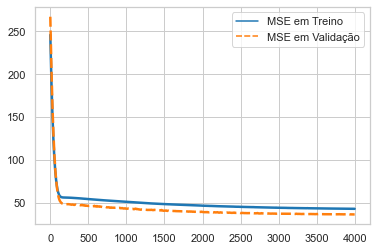

In [34]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [30]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [31]:
# Imprime as previsões
previsoes

array([21.058113, 18.82715 , 23.762814, 21.432693, 20.76065 , 20.84879 ,
       24.313667, 21.967026, 21.201336, 21.025063, 25.53106 , 23.333145,
       21.394135, 22.699661, 23.178905, 21.702614, 26.58319 , 23.267044,
       28.83619 , 20.215305, 20.639465, 21.15176 , 19.55428 , 21.058113,
       19.344954, 23.410267, 22.831867, 15.119894, 17.752981, 34.118893,
       21.592442, 18.67842 , 20.259377, 22.771275, 30.758675, 24.137394,
       21.878887, 27.525154, 25.44292 , 31.364616, 27.134045, 29.90485 ,
       31.243427, 17.752981, 23.00814 , 23.200943, 18.794098, 23.448826,
       35.93121 , 34.245586, 18.612316, 33.689224, 30.35104 , 25.586143,
       23.531456, 22.771275, 25.778942, 27.359898, 24.50647 , 24.159428,
       23.107296, 19.427584, 23.322128, 22.776783, 21.239899, 20.45768 ,
       21.361084, 22.203892, 21.735664, 21.653038, 26.632767, 24.61113 ,
       12.046122, 14.866501, 17.675861, 23.267044, 18.022902, 18.45257 ,
       23.300095, 21.603462, 20.463188, 25.624706, 

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>